# Introduction

This project aims to find the top 10 products and the best category from the selected categories of women, men, house and shoes on the e-commerce website NewChic.com. We analyzed the business problem of NewChic and pre-processed the data in many aspects. Two algorithms including K-means and hierarchical clustering are used to do clustering. Then we added product labels by taking the clustering results into account, and two algorithms including KNN and GaussianNB are utilized to do classification. Based on our analytical results, constructive suggestions are provided to help the company make better business decisions and maximize its profits.

# Problem Analysis


In order to find the top 10 products and the best category from the selected categories on the e-commerce website NewChic.com, an analytics plan is provided to guide our group to complete this project.

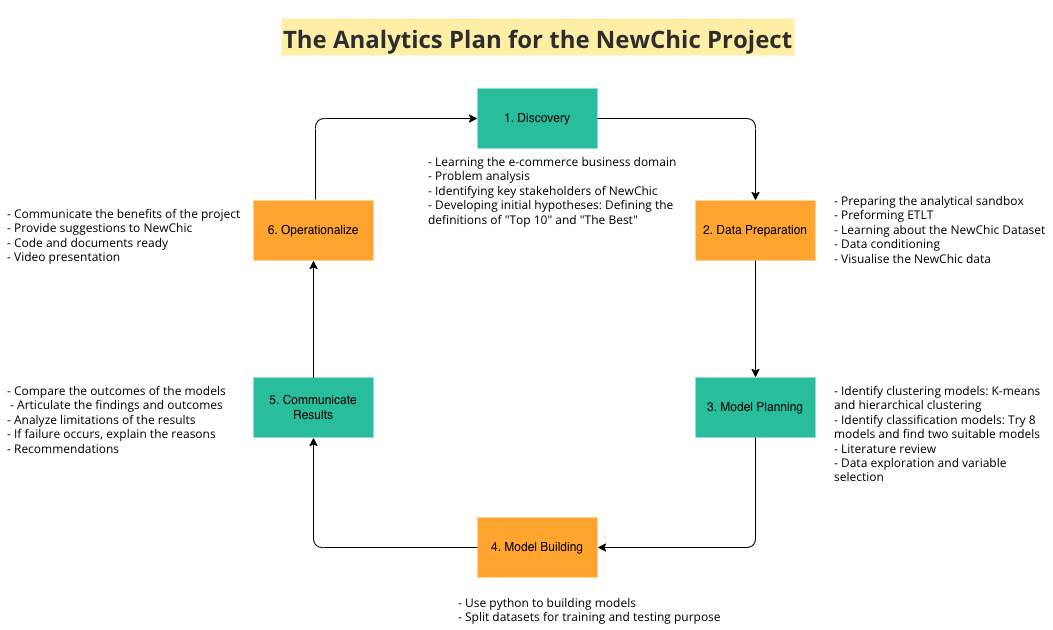

In this experiment, part of the NewChic dataset is used for analysis including **the categories of women, house, shoes and men**.
, so analysing those categories can enable us to have a good understanding of most NewChic products in general. Following is the product quantity distributions of all categories:

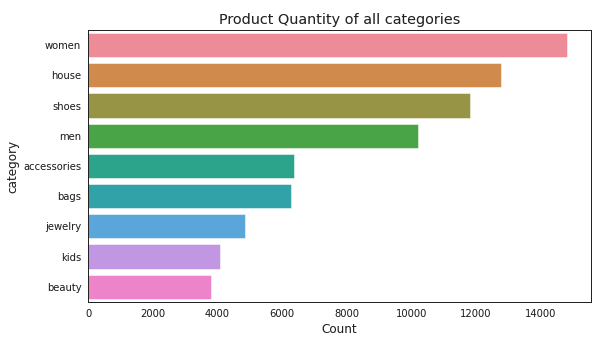

The key stakeholders of NewChic are the company and customers. In the discovery phase, we provide the definitions of "Top 10" and "The best" **from two perspectives.**

1) Firstly, we consider the definitions in the company's position. Let's assume that the higher the current price or the lower discount, the higher the profit margin for all the products. In this case, "Top 10 products" are products with high popularity and profit margin. Assuming that the like count represents the product popularity among customers, we can define the products with the following attributes as "Top 10 products":

- Relatively high current price
- Relatively low discount
- Relatively more like count

Besides, we can think about the issue in this way. If a product has a high current price and low discount but its like count is still high, it means the product's quality is high or the style itself is more attractive. This is the product that a company exactly wants to find.   

In addition, "The best category" should have the following attributes:

- There are a relatively large number of products in this category, which means this category contains a significant portion of products;
- This category should contain as many "Top 10" products as possible. "Top 10" products can bring a lot of profits to the company, and they can affect the sales profit of the categories they belong to;
- The average current price of the products in this category is relatively high, resulting in a high-profit margin;  
- The average discount of the products in this category is relatively low, resulting in a high-profit margin;
- The average like count of the products in this category is relatively high, which means that most products are popular and easy to sell.

2) We also consider the definitions of "Top 10" and "The best" in the customer's position. Generally speaking, customers prefer products with cheap prices, high discount rates and more like counts. In other words, they tend to consider the current price, discount and like count when shopping online. Therefore, products with the following attributes are best-sellers, which can be considered as "Top 10 products":

- Relatively low current price
- Relatively high discount (but less than 90%)
- Relatively more like count

Besides, "The best category" should have the following attributes:
- There are a relatively large number of products in this category, which means this category contains a significant portion of products;
- This category should contain as many "Top 10" products as possible. "Top 10" products are best-sellers and can bring a lot of profits to the company, and they can affect the sales profit of the categories they belong to;
- The average current price of the products in this category is relatively low, which attracts more customers' attention;  
- The average discount of the products in this category is relatively high (but less than 90%), which attracts more customers' attention;
- The average like count of the products in this category is relatively high, which means that most products are popular among customers.

**After discussion, we decided to adopt the first definition (hypothesis) as the foundation of our following data analysis.**

# Data Preparation

In [ ]:
# Import neccessary libraries
import os
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
import scipy.cluster.hierarchy as sch
from IPython import display
import sklearn

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, label_binarize, LabelBinarizer
from sklearn import model_selection
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve,auc, recall_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.svm import SVC
from scipy.spatial.distance import cdist

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

First, the 9 csv files of the NewChic dataset are loaded and consolidated into a single dataframe for further exploration. There are 74999 rows and 22 columns in this dataframe. Following is the first five products' information. After loading the data, we did data cleaning, data visualization, feature selection and adding a new variable (label) in the data preprocess phase.   

In [ ]:
# Load the 9 csv files
df = []
for file in os.listdir("./"):
    if file.endswith('.csv'):
        # print('Loading file {0}...'.format(file))
        df.append(pd.read_csv(os.path.join("./", file), encoding='unicode_escape'))

df_combined = pd.concat(df)
df_combined.head()

,category,subcategory,name,current_price,raw_price,currency,discount,likes_count,is_new,brand,...,variation_0_color,variation_1_color,variation_0_thumbnail,variation_0_image,variation_1_thumbnail,variation_1_image,image_url,url,id,model
0,house,Flowers,150pcs / pack de graines de fleurs Hosta,4.99,8.99,USD,45,867,False,Egrow,...,Violet,vert,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/egrow-flowers-8679/p-13...,1317953,SKU967403
1,house,Home Carpets,Tapis de maison antidÃ©rapants de style floral...,16.17,43.74,USD,63,703,False,DecBest,...,#1,#2,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/decbest-home-carpets-72...,1496436,SKUC30634
2,house,Outdoor Tools,IPRee â¢ 30KN Rappel d'escalade Dscender Eigh...,14.99,25.99,USD,42,52,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://imgaz1.chiccdn.com/thumb/view/upload/2...,https://fr.newchic.com/outdoor-tools-7288/p-90...,907293,SKU093263
3,house,Outdoor Tools,BÃ¢ton d'auto-dÃ©fense Ã poteau tÃ©lescopique...,13.99,34.97,USD,60,120,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/outdoor-tools-7288/p-13...,1339082,SKUA06367
4,house,Fournitures de nettoyage,Couvre-pied jetable automatique pour machine Ã...,74.99,151.24,USD,50,222,False,NaN,...,#1,#2,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/cleaning-supplies-4918/...,1664674,SKUF00488


In [ ]:
df_combined.shape

(49631, 22)

Following is the product quantity distributions of different categories. It is found that products in the categories of women, house, shoes and men account for about 66% of the total products, so analysing those categories can enable us to have a good understanding of most NewChic products in general. Therefore, this part of the NewChic dataset is used for analysis.

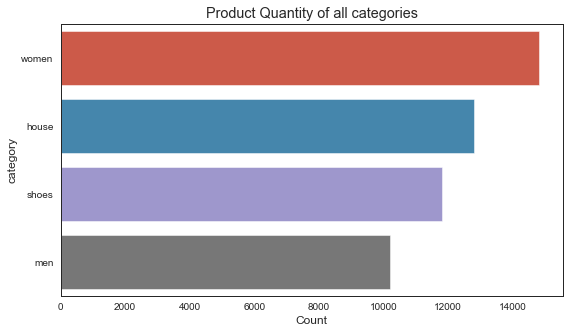

In [ ]:
# df_combined["category"].value_counts()
plt.subplots(figsize=(9,5))
sns.countplot(y="category", data=df_combined,order=df_combined["category"].value_counts().index)
plt.title("Product Quantity of all categories")
plt.xlabel("Count")
plt.show()

The following problems are considered in the data cleaning stage.

*   Missing value
*   Invalid value
*   Duplicated value
*   Outlier

Before that, the four categories including women, house, shoes and men are selected. We only keep the category, id, current_price, raw_price, discount and likes_count columns. Thus there are 49631 rows and 6 columns in the updated analytical sandbox. Among those columns, we mainly focus on the numerical columns including current_price, raw_price, discount and likes_count because some models we selected only accept numerical input.

In [ ]:
# Part of the NewChic dataset is used for analysis including the categories of women, house, shoes and men.
df_removed_category = df_combined[df_combined['category'].isin(['women', 'house', 'shoes', 'men']) ]
df_removed_category.shape

(49631, 22)

In [ ]:
# Only keep the category, id, current_price, raw_price, discount and likes_count columns
df_removed = df_removed_category[['category', 'id', 'current_price', 'raw_price', 'discount', 'likes_count']]
df_removed.head()

,category,id,current_price,raw_price,discount,likes_count
0,house,1317953,4.99,8.99,45,867
1,house,1496436,16.17,43.74,63,703
2,house,907293,14.99,25.99,42,52
3,house,1339082,13.99,34.97,60,120
4,house,1664674,74.99,151.24,50,222


The mean, minimum and maximum values of current_price, raw_price, discount and likes_count are examined in this step, so we have a better understanding of the column value ranges.

In [ ]:
df_removed[['current_price', 'raw_price', 'discount', 'likes_count']].describe()

,current_price,raw_price,discount,likes_count
count,49631.000000,49631.000000,49631.000000,49631.000000
mean,26.943637,56.240166,51.008886,220.048619
std,19.667458,48.215883,11.346810,602.732443
min,0.140000,0.000000,0.000000,0.000000
25%,15.350000,32.990000,45.000000,29.000000
50%,23.190000,48.990000,50.000000,77.000000
75%,33.990000,70.290000,58.000000,194.000000
max,1157.990000,5089.000000,100.000000,21547.000000


## Missing value



Missing values are checked in this step, and no missing value is found.

In [ ]:
# Check missing values for each column. No missing values are found.
df_removed.isnull().sum()

category         0
id               0
current_price    0
raw_price        0
discount         0
likes_count      0
dtype: int64

## Invalid value

After checking missing values, we deal with invalid values. We have found that some products' raw_price is 0 or discount is 100, which are invalid according to our domain knowledge. Because there are only a small portion of this sort of products, we delete them directly from the dataset (238 products with 0 raw_price and 2 products with 100 discount). There are 49391 products after removal.

In [ ]:
# Find the columns where raw_price equals 0.
print('There are {0} products with 0 raw price.'.format(df_removed[(df_removed['raw_price'] == 0)]['id'].count()))
# Because there are a small portion of columns containing raw_price equals 0, we delete those columns directly and only keep the columns where raw_price doesn't equal 0.
df_removed = df_removed[(df_removed['raw_price'] != 0)]
print('There are {0} products left.'.format(df_removed['id'].count()))

There are 238 products with 0 raw price.
There are 49393 products left.


In [ ]:
# Find the columns where discount equals 100
print('There are {0} products with 100 discount.'.format(df_removed[(df_removed['discount'] == 100)]['id'].count()))
#Because there are only 2 columns containing discount equals 100, we delete those columns directly and only keep the columns where raw_price doesn't equal 100.
df_removed=df_removed[(df_removed['discount'] != 100)]
print('There are {0} products left.'.format(df_removed['id'].count()))

There are 2 products with 100 discount.
There are 49391 products left.


## Duplicated value

Then we check duplicated values in the dataset. After removing duplicated products, there are 49221 remaining products.

In [ ]:
# Some rows are duplicated and remove all the duplicated rows
# sorting by id
df_removed.sort_values("id", inplace = True)

# dropping ALL duplicate values
df_removed.drop_duplicates(subset ="id", inplace = True)
print('There are {0} products left.'.format(df_removed['id'].count()))

There are 49221 products left.


## Outlier

Boxplots are used to check if there are any outliers in the dataset. According to the current_price boxplot, I firstly check the columns where current_price is larger than 1000 in the house category, which looks like outliers. We have found that the product is a toy. This might be a limited version of toy and the price might be reasonable，so we decided to keep it.

For the likes_count plot, the products with a large number of like count represent most popular products. We don't want to miss any popular product information, so we keep all the products.

Next, as far as the raw_price boxplot, we have found that the product with a raw price higher than 2000 is the identified toy above (id:1568253). Therefore, there is no need to remove it.

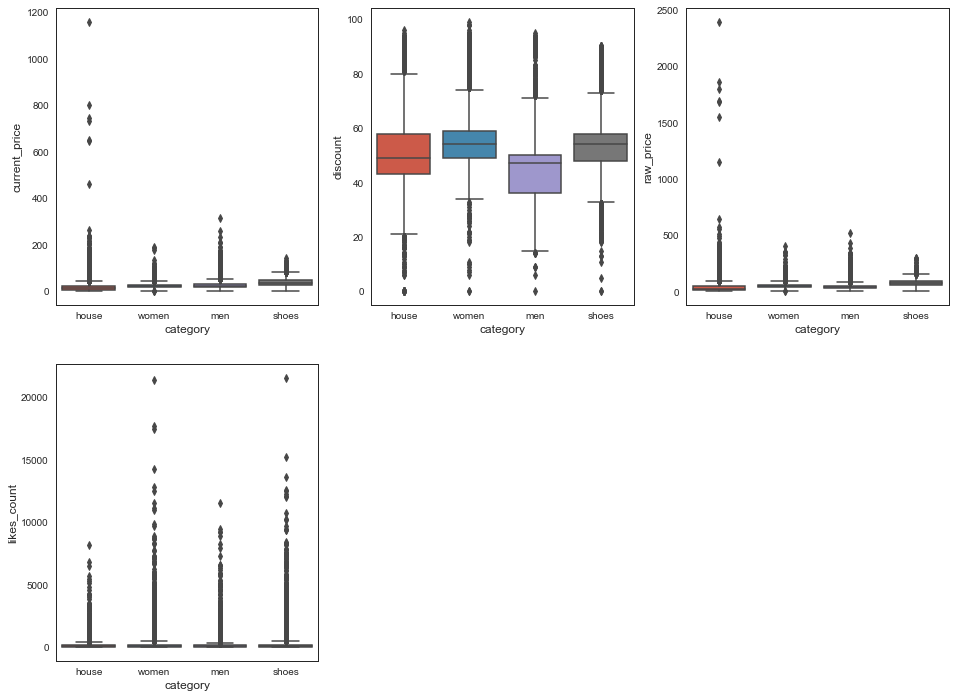

In [ ]:
# Boxplot of current_price by category
# TODO Check the code on Jupyter
plt.figure(figsize=[16,12])

plt.subplot(231)
sns.boxplot(x="category", y="current_price", data=df_removed)

# Boxplot of discount by category
plt.subplot(232)
sns.boxplot(x="category", y="discount", data=df_removed)

# Boxplot of raw_price by category
plt.subplot(233)
sns.boxplot(x="category", y="raw_price", data=df_removed)

# Boxplot of likes_count by category.
plt.subplot(234)
sns.boxplot(x="category", y="likes_count", data=df_removed)

plt.show()

In [ ]:
# Check the columns where current_price is larger than 1000 in the house category
# Check what the product above is and find the product is a toy. The price might be reasonable，so we keep this product.
df_house_check = df_combined.loc[ (df_combined.category == 'house') & (df_combined.current_price > 1000) ]
print(df_house_check)

     category subcategory                                               name  \
4028    house        Toys  WalkingPad Tapis roulant R1 Tapis de marche pl...   

      current_price  raw_price currency  discount  likes_count  is_new  \
4028        1157.99    2396.14      USD        52           60   False   

           brand  ... variation_0_color variation_1_color  \
4028  WalkingPad  ...               NaN               NaN   

     variation_0_thumbnail variation_0_image variation_1_thumbnail  \
4028                   NaN               NaN                   NaN   

     variation_1_image                                          image_url  \
4028               NaN  https://imgaz1.chiccdn.com/thumb/view/oaupload...   

                                                    url       id      model  
4028  https://fr.newchic.com/walkingpad-fitness-equi...  1568253  SKUD49960  

[1 rows x 22 columns]


## Visualization in data evaluation

Firstly, we visualized the value distribution of the current_price, discount and likes_count columns. It is found that most products have curent prices less than 100, discounts between 40 and 65, like count less than 2500.

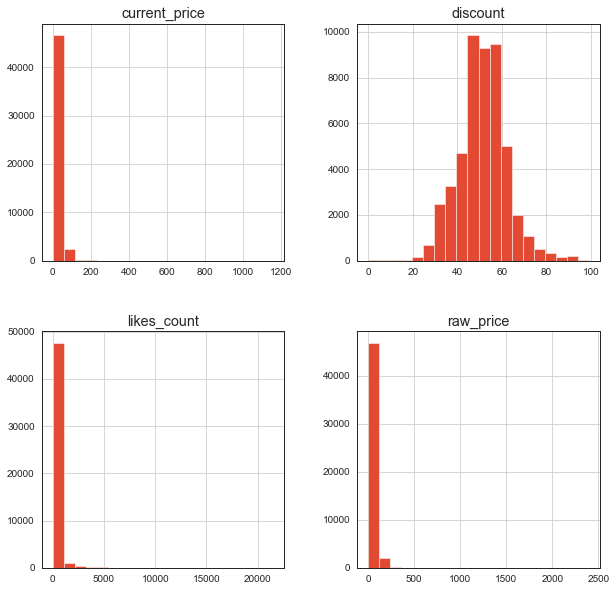

In [ ]:
show_hist = df_removed[['current_price', 'discount', 'likes_count','raw_price']]
p = show_hist.hist(figsize = (10,10),bins=20)

## Feature selection

Next, the relationship of different variables are visualized. Raw price is highly correlated with current price while other variables don't have a strong correlation with each other. Therefore, we decided to remove the raw_price column and only select curent_price, discount and likes_count for the clutering and classification algorithms.

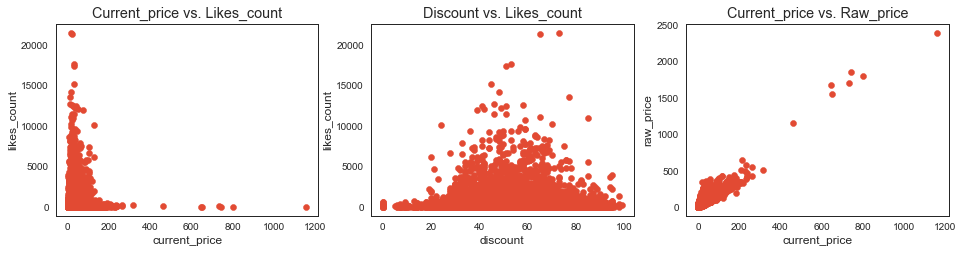

In [ ]:
plt.figure(figsize=[16,12])

plt.subplot(331)
# plot current_price vs. likes_count
plt.scatter(df_removed['current_price'], df_removed['likes_count'])
# Add title and axis names
plt.title('Current_price vs. Likes_count')
plt.xlabel('current_price')
plt.ylabel('likes_count')

plt.subplot(332)
plt.scatter(df_removed['discount'], df_removed['likes_count'])
# Add title and axis names
plt.title('Discount vs. Likes_count')
plt.xlabel('discount')
plt.ylabel('likes_count')

plt.subplot(333)
# plot current_price vs. raw_price
plt.scatter(df_removed['current_price'], df_removed['raw_price'])
# Add title and axis names
plt.title('Current_price vs. Raw_price')
plt.xlabel('current_price')
plt.ylabel('raw_price')

# Show graph
plt.show()

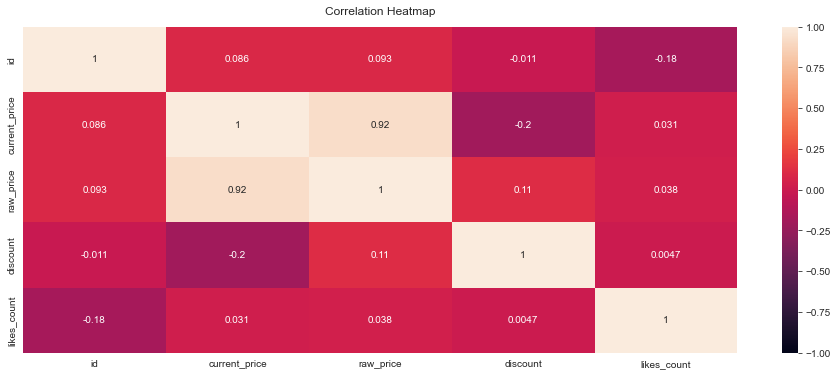

In [ ]:
# The size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_removed.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
#Remove raw_price because it is highly correlated with current_price
df_clean = df_removed[['category', 'id', 'current_price','discount', 'likes_count']]
df_clean

,category,id,current_price,discount,likes_count
2797,house,13732,12.99,38,133
7684,house,16512,2.44,55,125
682,house,25508,10.99,50,89
241,house,25802,10.07,35,208
11813,house,27366,2.99,47,0
...,...,...,...,...,...
1814,shoes,1724624,35.27,55,0
1815,shoes,1724625,46.46,55,0
1818,shoes,1724656,47.91,54,1
1819,shoes,1724666,98.99,55,0


## StandardScaler

Current_price, discount and likes_count are in different ranges and measured in different measurement units, which will affect model performance (Jaadi, 2019). In order to solve this problem, we sandardize the features.

In [ ]:
# Extract the column which needs to normalized
sub_df = df_clean[['current_price','discount','likes_count']]
# Standardize the data
df_sd=StandardScaler().fit_transform(sub_df)
df_clean_sd = pd.DataFrame(data=df_sd, columns=list(sub_df.columns))
df_clean_sd.head()

,current_price,discount,likes_count
0,-0.711535,-1.227021,-0.144534
1,-1.247326,0.346841,-0.158025
2,-0.813107,-0.116060,-0.218738
3,-0.859830,-1.504762,-0.018048
4,-1.219394,-0.393800,-0.368834


# Clustering

## Model selection

Clustering is an explorative data analysis technique used to group a dataset into various clusters by exploring and analyzing the similarity and differences between data or clusters. The data that share greatest similarity will be grouped together under a certain metric. Clustering can be used to gain meaningful insights by grouping data in innovative ways.(Govender and Sivakumar, 2020) Through investigation, clustering methods can be classified into hierarchical, partitioning, density-based, model based, grid-based, and soft-computing methods. In this project, we chose a partitioning method, K-means, and a hierarchical method, Agglomerative clustering. There are three simple reasons that we chose these two methods. After analyzing the dataset of this project and examining the clustering algorithms comparison chart and table on the official website of Scikit-learn, we find K-means and Agglomerative clustering are suitable for our project in terms of Scalability and Usecase. Secondly, they belong to different clustering types, we can make a comparison between different algorithms and find out the advantages and disadvantages. We chose these two methods because they have been widely used in different areas for a long time, based on this point that they must be practical and effective.  

In the following parts, the dataset will be further processed and applied into different clustering models with the purpose of discovering and extracting information that might be meaningful and insightful for NewChic company.

## 1. K-means

Kmeasns is an unsupervised algorithm, it suits the dataset without labels. It is also a descriptive algorithm, main function is to find out the nature and pattern of the data by clustering the instances into different groups, and within each group the instance shares similarities. It is powerful tool for understanding the dataset.

**In this particular case, as those products have different characteristics, which be different in likes-count or price, or discount, so we choose Kmeans to classify all the products into separate groups based on the same pattern they shared.**

Then we can discover how many types of products have, how each group of data distribute in different dimensions, and what the main difference and similarity between each group.

**Experiment**

First of all, plot all datapoints based on 3 preditors - current price, discount, and likes count, and see how the datapoints distribute in three dimensions. According to the plot shows, most the datapoints are continuous, as most of the datapoints are clustering together, excepte some scattered datapoints with high price or high likes-count.

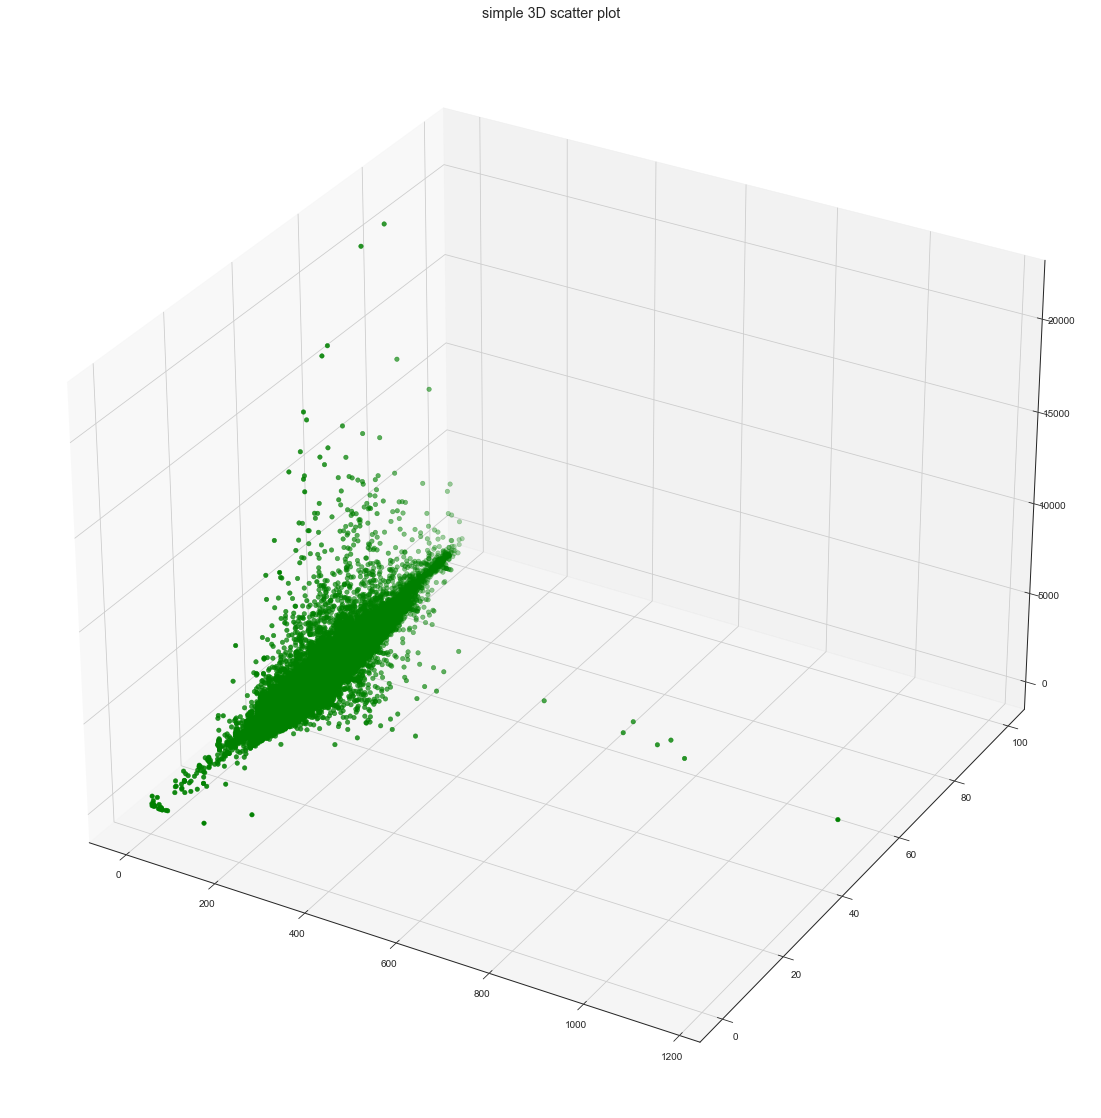

In [ ]:
# Plot the whole dataset by 3 predictor current price, discount, likes count
x_plot = df_clean['current_price']
y_plot = df_clean['discount']
z_plot = df_clean['likes_count']

# Creating figure
fig = plt.figure(figsize = (20, 20))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x_plot, y_plot, z_plot, color = "green")
plt.title("simple 3D scatter plot")

# Show plot of original dataset
plt.show()

This step is to choose the best k value by Elbow Curve Method. The method runs a range of values to perform K-means cluster, and calculate average distances between each centroid of the cluster. The method will plot the average distance across all the data points according to different cluster number, the point where the average distance start to fall smoothly is the elbow point, the number of the cluster we should choose.


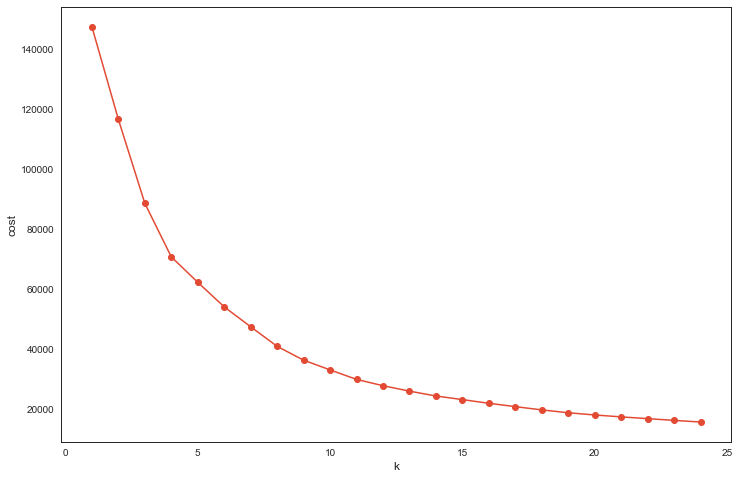

In [ ]:
# select the best K
cost=[]
K= range(1,25)
for k in K:
  kmeanModel=KMeans(n_clusters=k, random_state=99)
  kmeanModel.fit(df_clean_sd)
  cost.append(kmeanModel.inertia_)
plt.xlabel('k')
plt.ylabel('cost')
plt.plot(K, cost, 'o-')
plt.show()

From this polt shows, the k value is 4.

In [ ]:
# K should be 4, build model
# set.seed(42)
km_model = KMeans(n_clusters=4, n_init=25, max_iter = 1250, random_state=42)
#generate the cluster number
km_y_predicted = km_model.fit_predict(df_clean_sd)
#set cluster number in original dataset
df_clean['cluster_km'] = km_y_predicted
df_clean.head()


,category,id,current_price,discount,likes_count,cluster_km
2797,house,13732,12.99,38,133,1
7684,house,16512,2.44,55,125,3
682,house,25508,10.99,50,89,1
241,house,25802,10.07,35,208,1
11813,house,27366,2.99,47,0,1


This step is to build a Kmeans model and set up the cluster number as 4, initial run time is 25, maximum iteration is 1250 times, and random state is set for result consistency.

In this step, the algorithm will run in this way:

1. Choose 4 datapoints randomly as we set and the location of those 4 datapoints is the initial centroid. Thoes 4 datapoint will be labeled respectively.

2. After that all the datapoints will go through one by one, to calculate the distance to each centroid, the datapoint closest to one centroid will be grouped to this cluster.

3. Meanwhile, as newly joined datapoints will affect the value of the centroid in this group, so the centroid will be kept updated based on all the datapoints of this cluster

4. Assigning datapoints and recomputing the centroid(2 and 3) will keep repeating until the centroid value of the cluster stays unchanged, which means each centroid has centered itself in the middle of its cluster.

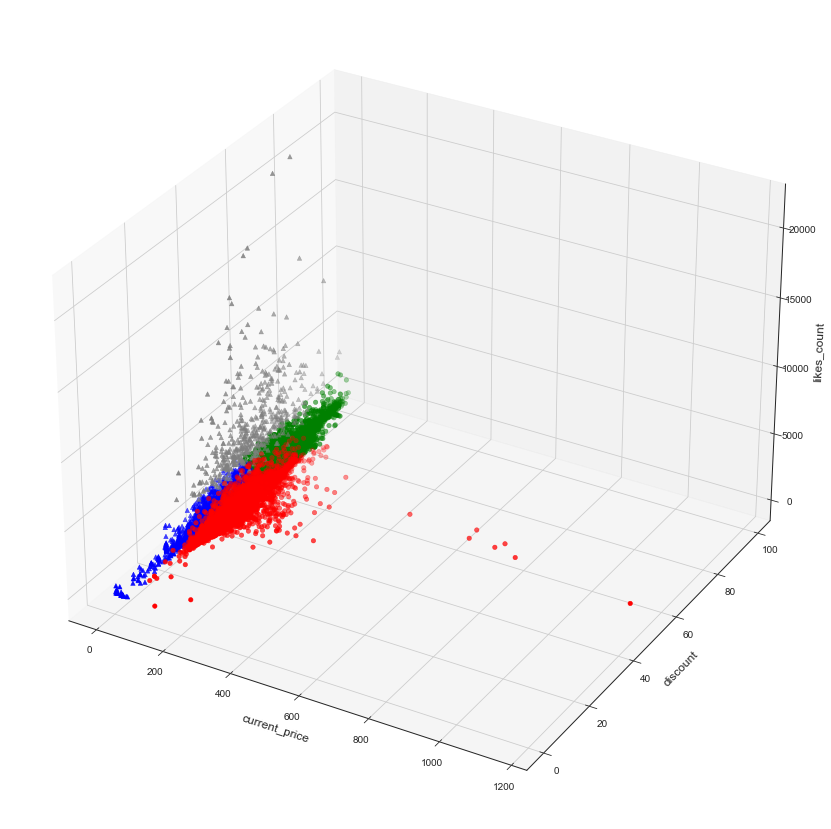

In [ ]:
# separate clusters
df0 = df_clean[df_clean.cluster_km == 0]
df1 = df_clean[df_clean.cluster_km == 1]
df2 = df_clean[df_clean.cluster_km == 2]
df3 = df_clean[df_clean.cluster_km == 3]

# plot all the cluster together
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

x0 = df0['current_price']
y0 = df0['discount']
z0 = df0['likes_count']

x1 = df1['current_price']
y1 = df1['discount']
z1 = df1['likes_count']

x2 = df2['current_price']
y2 = df2['discount']
z2 = df2['likes_count']

x3 = df3['current_price']
y3 = df3['discount']
z3 = df3['likes_count']

ax.scatter(x0, y0, z0, c='red', marker='o')
ax.scatter(x1, y1, z1, c='blue', marker='^')
ax.scatter(x2, y2, z2, c='gray', marker='^')
ax.scatter(x3, y3, z3, c='green', marker='o')

ax.set_xlabel('current_price')
ax.set_ylabel('discount')
ax.set_zlabel('likes_count')

plt.show()

From the graph we can tell 4 clusters have different characteristics, one cluster with a higher likes count, one cluster with a higher current price, and another two clusters are located underneath, they are in the same current price range and same likes-count range, but different in discount. One with a higher discount and another one with a lower discount.

When looking at the distribution of each cluster, we can tell it is uneven, the cluster with high likes has the least data points, the cluster with high current price with second least data points, rest of the two clusters have similar number of data points which is much higher than another two.

In [ ]:
df_clean.groupby(['cluster_km'])['cluster_km'].count()

cluster_km
0     7842
1    21316
2      509
3    19554
Name: cluster_km, dtype: int64

====================== Cluster 0 density ===============================


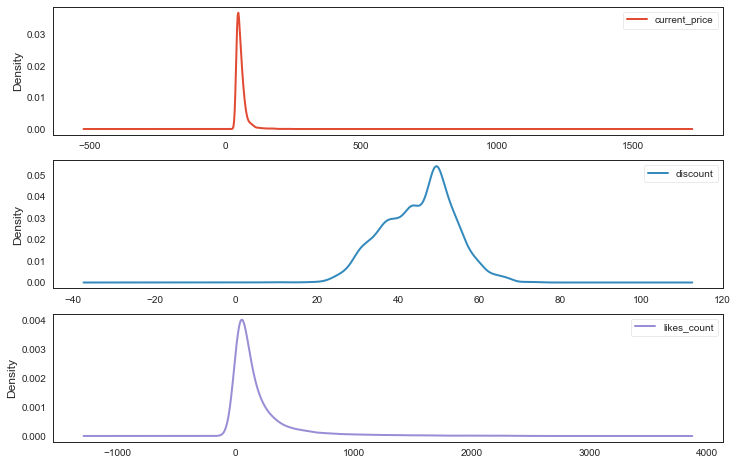

====================== Cluster 1 density ===============================


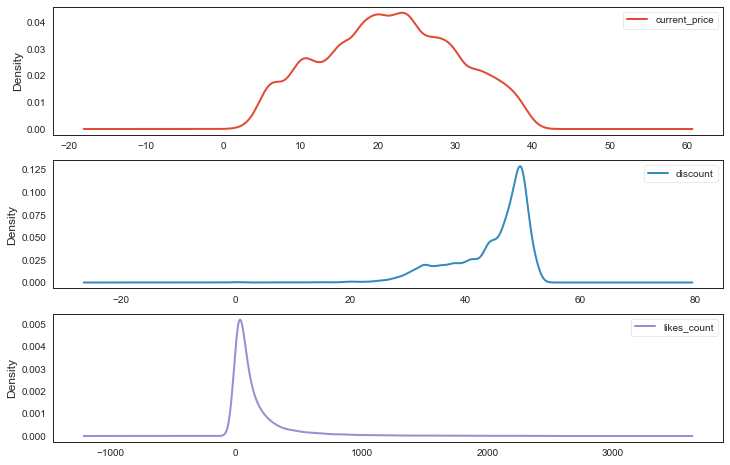

====================== Cluster 2 density ===============================


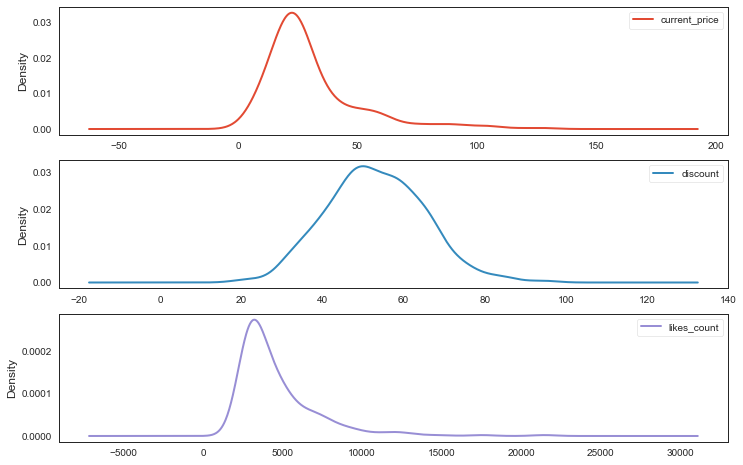

====================== Cluster 3 density ===============================


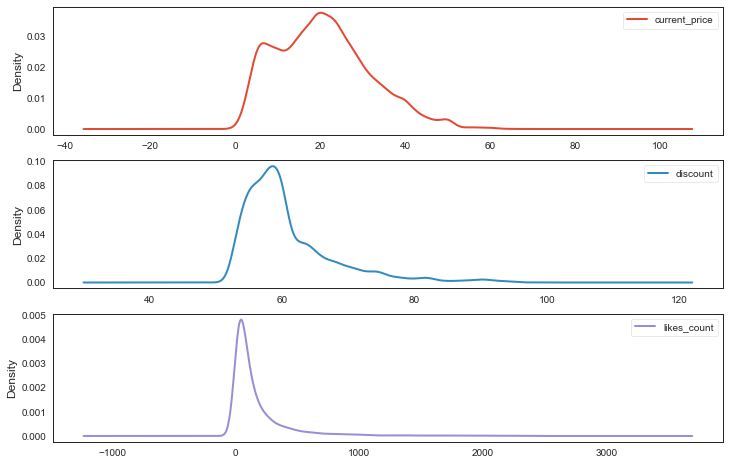

In [ ]:
print("====================== Cluster 0 density ===============================")
cluster = df_clean[(df_clean['cluster_km'] == 0) ]
predictor = cluster[['current_price','discount','likes_count']]
p1 = predictor.plot(kind='kde', linewidth = 2, subplots = True, sharex = False)
plt.show()

print("====================== Cluster 1 density ===============================")
cluster = df_clean[(df_clean['cluster_km'] == 1) ]
predictor = cluster[['current_price','discount','likes_count']]
p1 = predictor.plot(kind='kde', linewidth = 2, subplots = True, sharex = False)
plt.show()

print("====================== Cluster 2 density ===============================")
cluster = df_clean[(df_clean['cluster_km'] == 2) ]
predictor = cluster[['current_price','discount','likes_count']]
p1 = predictor.plot(kind='kde', linewidth = 2, subplots = True, sharex = False)
plt.show()

print("====================== Cluster 3 density ===============================")
cluster = df_clean[(df_clean['cluster_km'] == 3) ]
predictor = cluster[['current_price','discount','likes_count']]
p1 = predictor.plot(kind='kde', linewidth = 2, subplots = True, sharex = False)
plt.show()

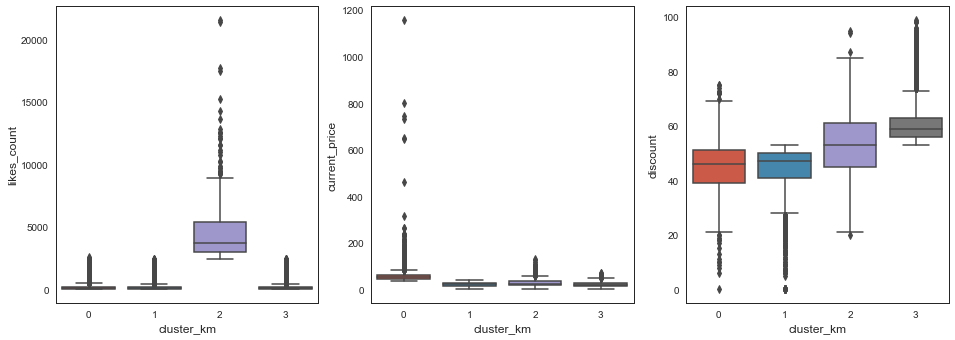

In [ ]:
plt.figure(figsize=[16,12])
plt.subplot(231)
sns.boxplot(x="cluster_km", y="likes_count", data=df_clean)

plt.subplot(232)
sns.boxplot(x="cluster_km", y="current_price", data=df_clean)

plt.subplot(233)
sns.boxplot(x="cluster_km", y="discount", data=df_clean)

plt.show()

In [ ]:
#Find the difference between each cluster and find the mean value for each column by cluster
data_mean = df_clean[['current_price','cluster_km','discount','likes_count']].groupby(['cluster_km']).agg('mean')
print(data_mean)

            current_price   discount  likes_count
cluster_km                                       
0               57.068731  45.259245   192.345065
1               21.544663  44.537390   161.371599
2               30.455383  53.133595  4639.742633
3               20.799282  60.930091   176.686458


We also plot boxplots and combine the mean value to analyze those clusters more specifically.

According to the graphs can tell there are 4 clusters. One with high likes-count which distributes between 2K to 9k, mean value is around 4.6k, much higher than others, price distribute between 10 to 50, the mean value is 30, discount highly distributes between 50% to 60%, the mean value is 53.

One with a high price which distributes between 50 to 100, this cluster also included some products with a much higher price than average level, the mean value is around 57.6, likes count below 500 average, the mean value is 192, discount highly distributes between 20% to 50%, the mean value is 45%.

Another two with low likes count, mostly under 200, mean value is around 170, price distributes between 0 to 40, mean value is around 20. however, one discount is highly distributed between 30% to 50%, highly distribute between 50% to 70%, the mean value is 44 and 60 respectively.

Conclusion of cluster's characteristics:

|               | cluster type A |            | cluster type B |            | cluster type C |            | cluster type D |            |
|:-------------:|:--------------:|:----------:|:--------------:|:----------:|:--------------:|:----------:|:--------------:|:----------:|
|               | level          | mean value | level          | mean value | level          | mean value | level          | mean value |
| likes_count   | low            | 161        | high           | 4639       | middle high     | 192        | middle low            | 176        |
| current_price | middle low            | 21         | middle high       | 30         | high           | 57         | low            | 20         |
| discount      | low            | 44         | middle high            | 53         | middle low            | 45         | high           | 60         |


The cluster's characteristics table implys that, cluster type B high in likes-count, cluster type C high in price,cluster type A and D both low in price and likes-count but type D with a higher discount, type A with a lower discount.

## Agglomerative Clustering

In this section, we will apply the preprocessed dataset (K-means used) to the Hierarchical clustering algorithm to discover some unknown clusters of the products and compare the similarity and differences between Agglomerative clustering and the K-mean.    

Hierarchical clustering is an unsupervised learning method which is used to group observations that have similarities into various clusters. Unlike K-means, this method does not need a specified clusters number in advance, but rather chooses a rational cluster value with the help of a dendrogram process. A dendrogram is a tree-like graph that shows the possible number of clusters that can be divided. In a dendrogram chart, all data points in a group at a branch also belong to the upper group. After drawing the dendrogram graph, the number of clusters can be easily discerned.

In the following step, we are going to draw the dendrogram graph with the "Ward” method for the linkage criteria. The “Ward” method is a method that tries to minimize the variance within each cluster. While we are trying to minimize the Within Cluster Sum of Squares(WCSS) to plot our elbow method chart in K-means, we are trying to minimize the within-cluster variance which is the variance within each cluster. The reason we choose "Ward" is because of the results of the experiments carried out in the article by Vijaya, Sharma and Batra, 2019. In this article, it compares different metrics for linkage, and finds "Ward" has a better performance. It is also because it will take a very long time to draw different dendrogram graphs with different methods. To use this method, we must use the Euclidean distance measure metric. And this metric is mentioned in K-means part as well.

In the dendrogram drawing step, we need to introduce the dataset. Here, we are going to use the same dataset as the K-mean algorithm used, which is normalized for consistency.

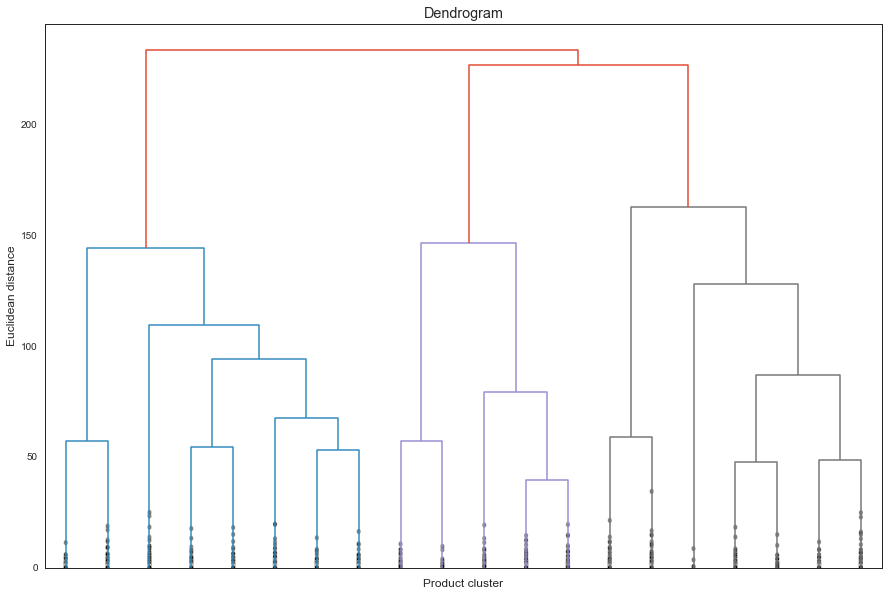

In [ ]:
# create a dendrogram varialle linkage for Hierarchical clustering algorithm
# to develop the dendrogram tree
plt.figure(figsize=(15,10))
# dendrogram = sch.dendrogram(sch.linkage(df_clean_sd, method = "ward"))
dendrogram_Z = sch.linkage(df_clean_sd,  method='ward')
sch.dendrogram(dendrogram_Z, truncate_mode='lastp', p=20, show_leaf_counts=False, leaf_rotation=90, leaf_font_size=15, show_contracted=True)

# the metod we choose is "ward"
plt.title("Dendrogram")
plt.xlabel("Product cluster")
plt.ylabel("Euclidean distance")
plt.show()

The figure above is the vertical dendrogram chart. The x-axis consists of the clusters of products and the y-axis consists of the Euclidean distance between the clusters. In the graph, each vertical line stands for a cluster, and it is constructed from the bottom to the top. At the beginning, each objective is a cluster, and as the algorithm progresses, similar data will be grouped into an upper cluster. If we cut the dendrogram at the Euclidean distance of 180, the dataset can be best divided into 3 clusters according to the largest vertical distance line; if we cut the dendrogram at the distance of 155, the dataset can be best divided into 4 clusters; if we cut the dendrogram at the distance of 140, the dataset can be best divided into 6 clusters. Because the best K(found by elbow method) for K-means algorithm is 4, we decided to build 3 models with different numbers of clusters to carry out more experiments for the hierarchical clustering.

In the following steps, we are going to fit the hierarchical clustering to our dataset to get the predicted clusters' labels that each product belongs to. The model is built to merge objectives into 3 different groups. After the model is built, we store the labels to the target dataset “df_clean” for further analysis. The new column is defined as “cluster_hc3”.

### Building a model with 3 clusters

In [ ]:
# build the model with 3 clusters
hc_model_c3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
# fit the dataset x to the model to get the
y_hc_c3=hc_model_c3.fit_predict(df_clean_sd)
#get the array
# store the hierarchical clustering clusters into the cleaned dataset
df_clean["cluster_hc3"] = y_hc_c3
df_clean.head()

,category,id,current_price,discount,likes_count,cluster_km,cluster_hc3
2797,house,13732,12.99,38,133,1,0
7684,house,16512,2.44,55,125,3,1
682,house,25508,10.99,50,89,1,1
241,house,25802,10.07,35,208,1,0
11813,house,27366,2.99,47,0,1,1



Agglomerative clustering is known as the bottom-up approach since it begins with the objective of its own group. The objectives or groups that are near to one another continue to be merged. It does this indefinitely until the termination condition is met, or until all the groups are combined into one. (Makara et al., 2017)
In this project, Agglomerative clustering may help to find the underlying commonness among products in different categories. In each subsequent iteration, agglomerative hierarchical clustering combines the nearest pair of groups by meeting certain similarity criterion, unless all the data is in a single cluster, in which case it starts with every single item or sample in a single cluster.  

The process can be listed in the following steps:

1. First, place every object in a distinct cluster.
2. Analyze all pair-wise distances between clusters distance metrics
3. Using the distance values, create a distance matrix.
4. Locate the pair of clusters that are closest together, take them out of the matrix, and then merge them.
5. Assess all separations between this new cluster and every other cluster, then update the matrix.
6. Repeat until there is just one element left in the distance matrix

From the display of the first 5 lines of the new dataset, df_clean is updated with the new column “cluster_hc3”. Then we are going to plot these grouped objectives with different colors in a Pair grid graph to display the distribution and correlation of different clusters.

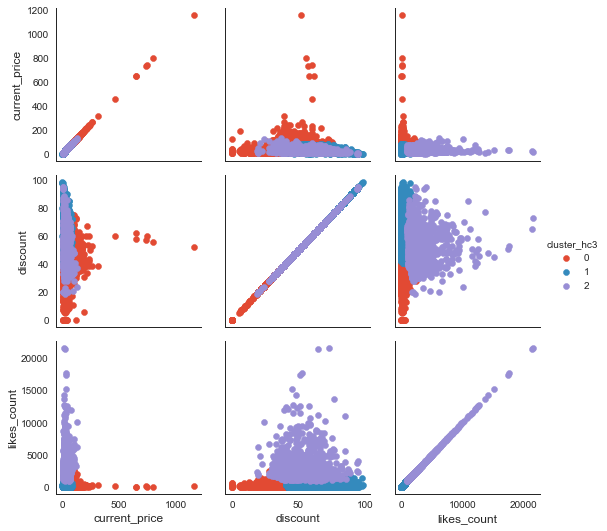

In [ ]:
# plot the Grid chart of 3 clusters
gr_hc3 = sns.PairGrid(df_clean, vars=["current_price","discount","likes_count"],hue="cluster_hc3")
gr_hc3.map(plt.scatter)
gr_hc3.add_legend()

From the graph above, the characteristics of different clusters are clear. Cluster 0 in red has objectives with high “current_price” near the discount rate of 60%. It has a low “current_price” with a wide range of different discount rates. Cluster 1 in blue has a low “likes_count” ranging over different discount rates from approximate 45% and low “current_price” cheaper than $100; Cluster 2 in purple has objectives of high “likes_count” with a wide discount range over 20% and low “current_price”. If we plot a box graph, we can further understand the distribution of these 3 clusters.

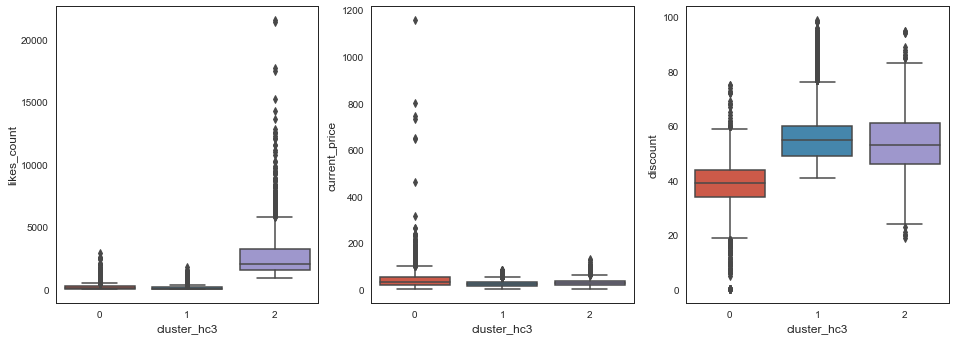

In [ ]:
# check the outstanding data
plt.figure(figsize=[16,12])
plt.subplot(231)
sns.boxplot(x="cluster_hc3", y="likes_count", data=df_clean)

plt.subplot(232)
sns.boxplot(x="cluster_hc3", y="current_price", data=df_clean)

plt.subplot(233)
sns.boxplot(x="cluster_hc3", y="discount", data=df_clean)

plt.show()

From the box graph, clusters gravitated to an area of low “current_price” with the “likes_count” below 2000 and with the discount between 40 to 60%. But each cluster has its own features as discussed before. Cluster labeled 0 has objectives that are high in “current_price” and over $400. Cluster 2 has lots of objectives with high “likes_count”.

Next, we are going to count the amount of each cluster and check the mean value of each cluster over the “current_price”, “discount” and “likes_count”.

In [ ]:
# count the numbers of products in different clusters
data_hc3_ct = df_clean.groupby(['cluster_hc3'])['cluster_hc3'].count()
print("The amount of objectives in each cluster:\n",data_hc3_ct)
print()
# calculate the average number of each clusters
data_hc3_mean = df_clean[["cluster_hc3","current_price","discount","likes_count"]].groupby(["cluster_hc3"]).agg("mean")
print("The mean value of each cluster labeled:\n", data_hc3_mean)

The amount of objectives in each cluster:
 cluster_hc3
0    12664
1    35226
2     1331
Name: cluster_hc3, dtype: int64

The mean value of each cluster labeled:
              current_price   discount  likes_count
cluster_hc3                                       
0                37.886259  39.053064   186.967230
1                22.995504  55.546017   132.817067
2                29.420556  53.735537  2793.655898


From the data, the number of objectives in each cluster with label 0, 1, 2 is 12664, 35226 and 1331 respectively. Cluster labeled 1 accounts for the largest number of objectives. That means over 71% of the products in the 4 categories (we chose) are in high “discount”, low “current_price” and low “likes_count”. Considering the former data, cluster labeled 2 with less objectives has high “discount” over 45% and high “likes_count”. The small quantity of objectives might be very popular.

<AxesSubplot:xlabel='cluster_hc3'>

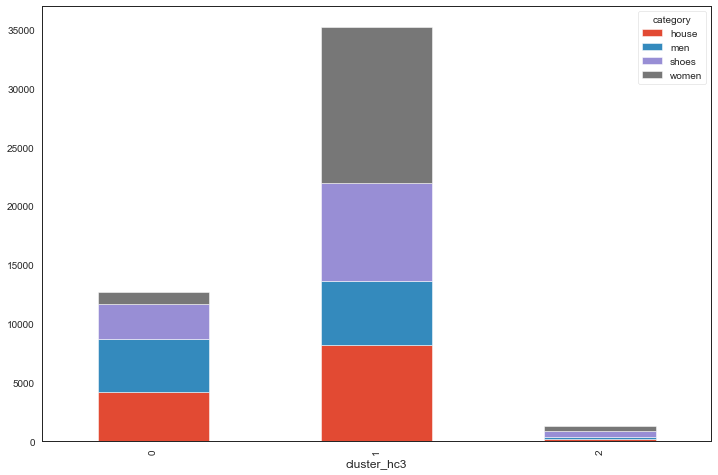

In [ ]:
# plot the stacked categories graph for different clusters
df_plot_hc3 = df_clean.groupby(["cluster_hc3","category"]).size().reset_index().pivot(columns="category",index="cluster_hc3",values=0)
df_plot_hc3.plot(kind="bar",stacked=True)


From the stacked graph, cluster 0 is mainly the category of men and house; Cluster 1 is mainly the category of women, after that comes the house and shoes; Cluster 2 is mainly the shoes. Overall, the category of shoes might be more popular, the products for women are cheap.

Overall, the results of this algorithm with 3 clusters can be displayed in the table below:





|               |   cluster 0   |          | cluster 1 |            | cluster 2  |           ||
|:-------------:|:--------------:|:----------:|:--------------:|:----------:|:--------------:|:----------:|:--------------:|
|               | index range          | mean value | index range           | mean value | index range           | mean value |  
| likes_count   |   medium          | 186.97        | low           | 132.82       |  high     | 2793.66        |  
| current_price |  high            | 37.89         | low       |   22.99       | medium           | 29.42          
| discount      | low            | 39.05         |  high            | 55.54         | medium            | 53.74         

From the table, cluster 0 has the characteristics of: medium "likes_count", high "current_price" and low "discount". Cluster 1 has the characteristics of: low "likes_count", low "current_price" and high "discount". Cluster 2 has the characteristics of: high "likes_count", medium "current_price" and medium "discount".

### Building a model with 4 clusters


In the following steps, we are going to fit the hierarchical clustering to our dataset to get the predicted clusters' labels that each product belongs to. The model is built to merge objectives into 4 different groups. After the model is built, we store the labels to the target dataset “df_clean” for further analysis. The new column is defined as “cluster_hc4”.

In [ ]:
# build the model with 4 clusters
hc_model_c4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='ward')
# fit the dataset x to the model to get the
y_hc_c4=hc_model_c4.fit_predict(df_clean_sd)
# get the array
# store the hierarchical clustering clusters into the cleaned dataset
df_clean["cluster_hc4"] = y_hc_c4
df_clean.head()


,category,id,current_price,discount,likes_count,cluster_km,cluster_hc3,cluster_hc4
2797,house,13732,12.99,38,133,1,0,3
7684,house,16512,2.44,55,125,3,1,1
682,house,25508,10.99,50,89,1,1,1
241,house,25802,10.07,35,208,1,0,3
11813,house,27366,2.99,47,0,1,1,1


Agglomerative clustering processes the same way whatever the number of clusters we define. From the display of the first 5 lines of the new dataset, df_clean is updated with the new column “cluster_hc4”. Then we are going to plot these grouped objectives with different colours in a Pair grid graph to display the distribution and correlation of different clusters.

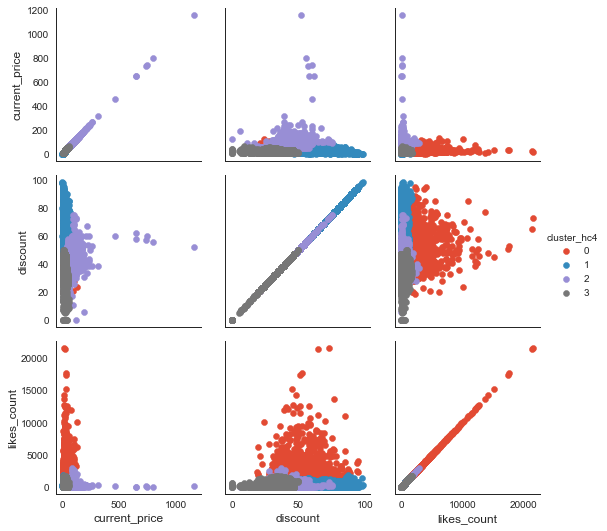

In [ ]:
# plot the Grid chart of 4 clusters
gr_hc4 = sns.PairGrid(df_clean, vars=["current_price","discount","likes_count"],hue="cluster_hc4")
gr_hc4.map(plt.scatter)
gr_hc4.add_legend()

From the graph above, the characteristics of different clusters are clear. Cluster 0 in red has objectives with high “likes_count” and with a low “current_price”. Objectives in this cluster have a wide range of different discount rates. Cluster 1 in blue has low “likes_count” ranging in different discount rates over 45% and low “current_price” within \$100; Cluster 2 in purple has objectives at high “current\_price” over $500 at a discount around 60%. Cluster 3 groups objectives in gray which are low in all indexes. If we plot a box graph, we can further understand the distribution of these 4 clusters.

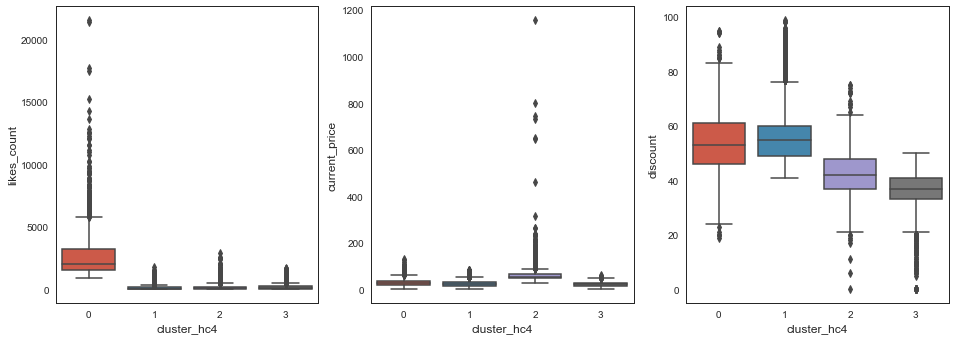

In [ ]:
# check the outstanding data
plt.figure(figsize=[16,12])
plt.subplot(231)
sns.boxplot(x="cluster_hc4", y="likes_count", data=df_clean)

plt.subplot(232)
sns.boxplot(x="cluster_hc4", y="current_price", data=df_clean)

plt.subplot(233)
sns.boxplot(x="cluster_hc4", y="discount", data=df_clean)

plt.show()

From the box graph, Cluster 0 outperforms the rest of the clusters in “likes_count”, some objectives have a high “likes_count” of over 10000 with a discount ranging from 45 to 60%. Cluster 1 has lots of objectives that are at a discount of over 80% or more. Some objectives in cluster 2 have low “discount” below 15% or high “current_price” over $400. Cluster 3 has a low discount that ranges from 0 to 40, and lots of the objectives in cluster 3 are at a discount that is below 20%.

Next, we are going to count the amount of each cluster and check the mean value of each cluster in “current_price”, “discount” and “likes_count”.

In [ ]:
# count the numbers of products in different clusters
data_hc4_ct = df_clean.groupby(['cluster_hc4'])['cluster_hc4'].count()
print("The amount of objectives in each cluster:\n",data_hc4_ct)

# calculate the average number of each clusters
data_hc4_mean = df_clean[['cluster_hc4','current_price','discount','likes_count']].groupby(['cluster_hc4']).agg('mean')
print("The mean value of each cluster labeled:\n",data_hc4_mean)

The amount of objectives in each cluster:
 cluster_hc4
0     1331
1    35226
2     5359
3     7305
Name: cluster_hc4, dtype: int64
The mean value of each cluster labeled:
              current_price   discount  likes_count
cluster_hc4                                       
0                29.420556  53.735537  2793.655898
1                22.995504  55.546017   132.817067
2                60.673941  42.310319   180.705169
3                21.169054  36.663518   191.561123


From the data, the number of objectives in each cluster with label 0, 1, 2, 3 is 1331, 35226, 5359 and 7305 respectively. Cluster 1 accounts for the largest number of all objectives. That means over 71.56% of products among the 4 categories we chose are at a high discount rate and low in “likes_count” and “current_price”.

In the following step, the stacked graph of the category distribution in each cluster is drawn. From this We have a general idea of what categories are and the corresponding general portion in each cluster.

<AxesSubplot:xlabel='cluster_hc4'>

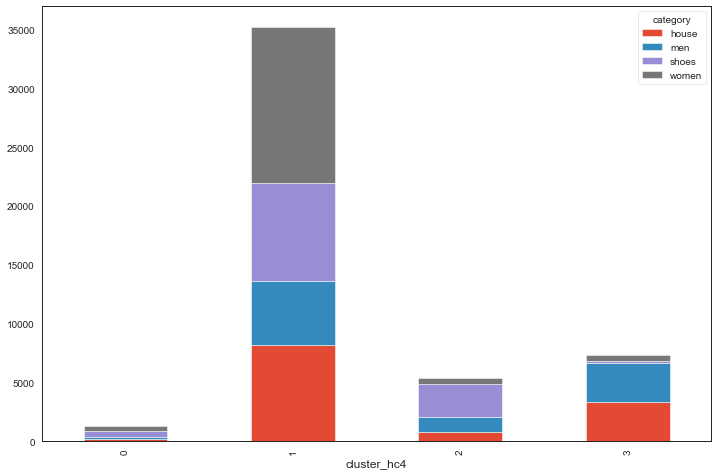

In [ ]:
# plot the stacked categories graph for different clusters
df_plot_hc4 = df_clean.groupby(["cluster_hc4","category"]).size().reset_index().pivot(columns="category",index="cluster_hc4",values=0)
df_plot_hc4.plot(kind="bar",stacked=True)

From the stacked graph, cluster 0 is mainly the category of men and shoes; Cluster 1 has products mainly categorized in women, after that comes the shoes and house; Cluster 2 is mainly the shoes. Cluster 3 is mainly men and house.

Overall, the results of this algorithm with 4 clusters can be displayed in the table below:

|               | cluster 0 |            | cluster 1 |            | cluster 2 |            | cluster 3 |            |
|:-------------:|:--------------:|:----------:|:--------------:|:----------:|:--------------:|:----------:|:--------------:|:----------:|
|               | index range          | mean value | index range          | mean value | index range          | mean value | index range          | mean value |
| likes_count   |  high            | 2793.66        | low           | 132.82       | medium     | 180.71        | medium high          | 191.56        |
| current_price | medium            | 29.42         |medium low      | 22.99         | high           | 60.67         |  low            | 21.17         |
| discount      | medium             | 53.76         |  high            | 55.55         | medium low            | 42.31         |  low           | 36.66         |

From the table, cluster 0 has the characteristics of: high "likes_count", medium "current_price" and medium "discount". Cluster 1 has the characteristics of: low "likes_count", medium low "current_price" and high "discount". Cluster 2 has the characteristics of: medium "likes_count", high "current_price" and medium low "discount". Cluster 3 has the characteristics of: medium high "likes_count", low "current_price" and low "discount".

### Building a model with 6 clusters

In the following steps, we are going to fit the hierarchical clustering to our dataset to get the predicted clusters' labels that each product belongs to. The model is built to merge objectives into 6 different groups. After the model is built, we store the labels to the target dataset “df_clean” for further analysis. The new column is defined as “cluster_hc6”.

In [ ]:
# build the model with 6 clusters
hc_model_c6 = AgglomerativeClustering(n_clusters=6, affinity='euclidean',linkage='ward')
# fit the dataset x to the model to get the
y_hc_c6=hc_model_c6.fit_predict(df_clean_sd)
#get the array
# store the hierarchical clustering clusters into the cleaned dataset
df_clean["cluster_hc6"] = y_hc_c6
df_clean.head()

,category,id,current_price,discount,likes_count,cluster_km,cluster_hc3,cluster_hc4,cluster_hc6
2797,house,13732,12.99,38,133,1,0,3,3
7684,house,16512,2.44,55,125,3,1,1,2
682,house,25508,10.99,50,89,1,1,1,2
241,house,25802,10.07,35,208,1,0,3,3
11813,house,27366,2.99,47,0,1,1,1,2


From the display of the first 5 lines of the new dataset, df_clean is updated with the new column “cluster_hc6”. Then we are going to plot these grouped objectives with different colours in a Pair grid graph to display the distribution and correlation of different clusters.

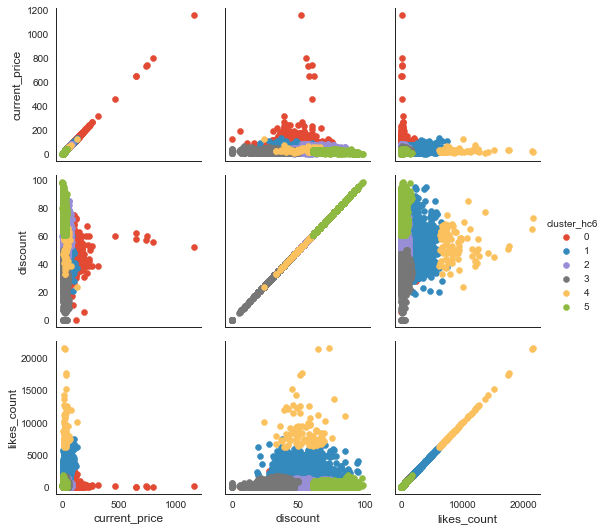

In [ ]:
# plot the Grid chart of 6 clusters
gr_hc6 = sns.PairGrid(df_clean, vars=["current_price","discount","likes_count"],hue="cluster_hc6")
gr_hc6.map(plt.scatter)
gr_hc6.add_legend()

From the graph above, the characteristics of different clusters are clear. Cluster 0 in red has objectives with a high “current_price” at discounts around 60% with a low “likes_count” number; Cluster 1 are products with numbers from 200 to 8000 for “likes_count” at a discount rate over 20% with a low price within $200; Cluster 2 in purple groups products with a small number in “likes_count” and “current_price” at a discount around 50%. Cluster 3 in grey is a cluster of low discounts, low “likes_count” index and low current_price. Cluster 4 in yellow grouped objectives with high “likes_count” numbers are cheap and have a normal discount between around 35 and 70%. Cluster 5 is a cluster of high discounts over 60%. If we plot a box graph, we can further understand the distribution of these 6 clusters.

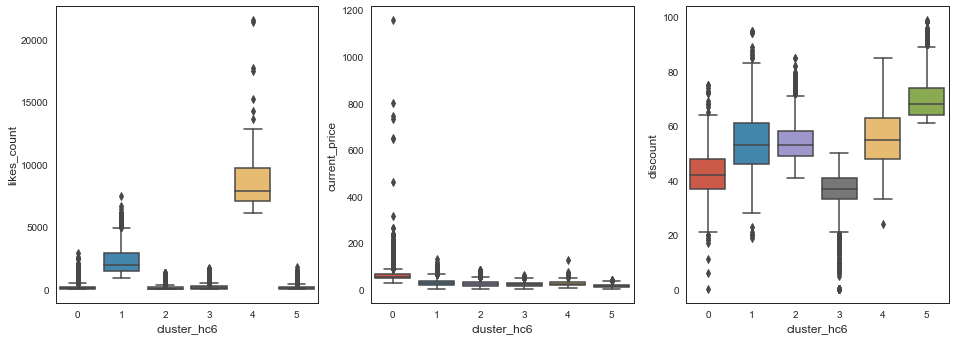

In [ ]:
# check the outstanding data
plt.figure(figsize=[16,12])
plt.subplot(231)
sns.boxplot(x="cluster_hc6", y="likes_count", data=df_clean)

plt.subplot(232)
sns.boxplot(x="cluster_hc6", y="current_price", data=df_clean)

plt.subplot(233)
sns.boxplot(x="cluster_hc6", y="discount", data=df_clean)

plt.show()

From the box graph, products in cluster 4 have high numbers in “likes_count” which are over 8000. Cluster 0 has products that are at a high current price, which are over $400. Cluster 3 has the lowest discount rate, which is below 40%. Cluster5 has the highest discount rate, which is over 60%. Cluster 4 is high in both discount rate and “likes_count”.

Next, we are going to count the amount of each cluster and check the mean value of each cluster in “current_price”, “discount” and “likes_count”.

In [ ]:
# count the numbers of products in different clusters
data_hc6_ct = df_clean.groupby(['cluster_hc6'])['cluster_hc6'].count()
print("The amount of objectives in each cluster:\n",data_hc6_ct)
print()

# calculate the average number of each clusters
data_hc6_mean = df_clean[["cluster_hc6","current_price","discount","likes_count"]].groupby(["cluster_hc6"]).agg("mean")
print("The mean value of each cluster labeled:\n",data_hc6_mean)

The amount of objectives in each cluster:
 cluster_hc6
0     5359
1     1239
2    30926
3     7305
4       92
5     4300
Name: cluster_hc6, dtype: int64

The mean value of each cluster labeled:
              current_price   discount  likes_count
cluster_hc6                                       
0                60.673941  42.310319   180.705169
1                29.633874  53.670702  2334.192897
2                24.099784  53.444836   131.171539
3                21.169054  36.663518   191.561123
4                26.547717  54.608696  8981.423913
5                15.053421  70.657907   144.651860


From the data, the number of objectives in each cluster with label 0, 1, 2, 3, 4, 5 is 5359, 1239, 30926, 7305, 92 and 4300 respectively. Cluster labeled 2 accounts for the largest number of objectives. That means over 62% of products in the 4 categories we chose are at the discount ranging from 45 to 85% with low “current_price” and low “likes_count”. Considering all data produced before, cluster 4 might be the most popular.

In the following step, the stacked graph of the category distribution in each cluster will be drawn. We can have a general idea of what category is included and the corresponding general portion in each cluster.

<AxesSubplot:xlabel='cluster_hc6'>

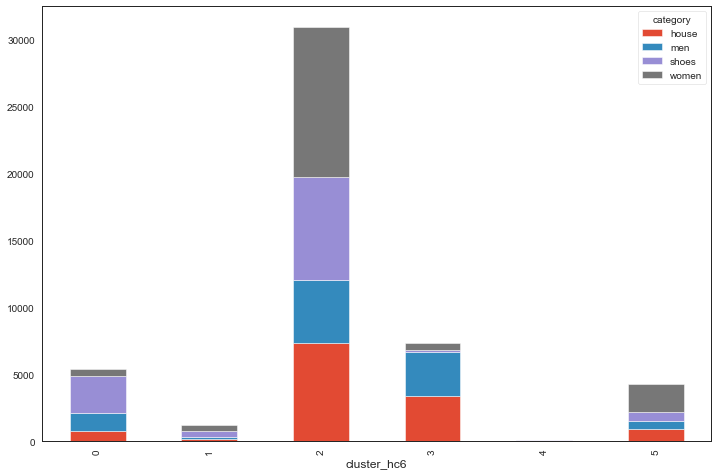

In [ ]:
# plot the stacked categories graph for different clusters
df_plot_hc6 = df_clean.groupby(["cluster_hc6","category"]).size().reset_index().pivot(columns="category",index="cluster_hc6",values=0)
df_plot_hc6.plot(kind="bar",stacked=True)


From the stacked graph, cluster 0 is mainly the category of shoes; Cluster 1 has more products of women and shoes. Cluster 2 has women products over 10000, has shoes products over 8000 and has houses products over 6000. Cluster 3 has more men and house products. Cluster 4 only has a few products. Cluster 5 has more women products than the others.

Overall, the results of this algorithm with 6 clusters can be displayed in the table below:

|               | cluster 0 |            | cluster 1 |            | cluster 2 |            | cluster 3 |            |cluster 4 |            |cluster 5 |            |
|:-------------:|:--------------:|:----------:|:--------------:|:----------:|:--------------:|:----------:|:--------------:|:----------:|:--------------:|:----------:|:--------------:|:----------:|
|               | index range          | mean value | index range          | mean value | index range          | mean value | index range          | mean value |index range          | mean value |index range          | mean value |
| likes_count   | medium low            | 180.71        |  high           | 2334.19       |extremely low     | 131.17      | medium             | 191.56        | extremely high         | 8981.42        | low            | 144.65       |
| current_price | extremely high            | 60.67         | medium high      | 29.63         | medium low           | 24.10         | low            | 21.17        | medium            | 26.54         | extremely low            | 15.05        |
| discount      |  low            | 42.31         | medium              | 53.67         | medium low            | 53.44         |  extremely low           | 36.66         |medium high        | 54.61         |high           | 70.66         |

From the table, cluster 0 has the characteristics of: medium low "likes_count", extremely high "current_price" and low "discount". Cluster 1 has the characteristics of: high "likes_count", medium high "current_price" and medium "discount". Cluster 2 has the characteristics of: extremely low "likes_count", medium low "current_price" and medium low "discount". Cluster 3 has the characteristics of: medium "likes_count", low "current_price" and extremely low "discount". Cluster 4 has the characteristics of: extremely high "likes_count", medium "current_price" and medium high "discount". Cluster 5 has the characteristics of: low "likes_count", extremely low "current_price" and high "discount".  

After comparing the hierarchical clustering with different potential cluster settings, the algorithm proved to be really helpful and useful. It can group objectives under a cetain metric. From the experiments, when we build the model, if we set the parameter "n_clusters" with a larger number, differences between grouped clusters sometimes will be less significant.Or, in some circumstances, differences between grouped clusters sometimes will be extremely significant.



## Algorithm comparison

In this part, we will plot the mean distribution of each algorithm(discussed above) with the normalised data. And make a comparison between Agglomerative clustering and K-means.

<AxesSubplot:title={'center':'Mean distribution of cluster_km 4'}, ylabel='cluster_km'>

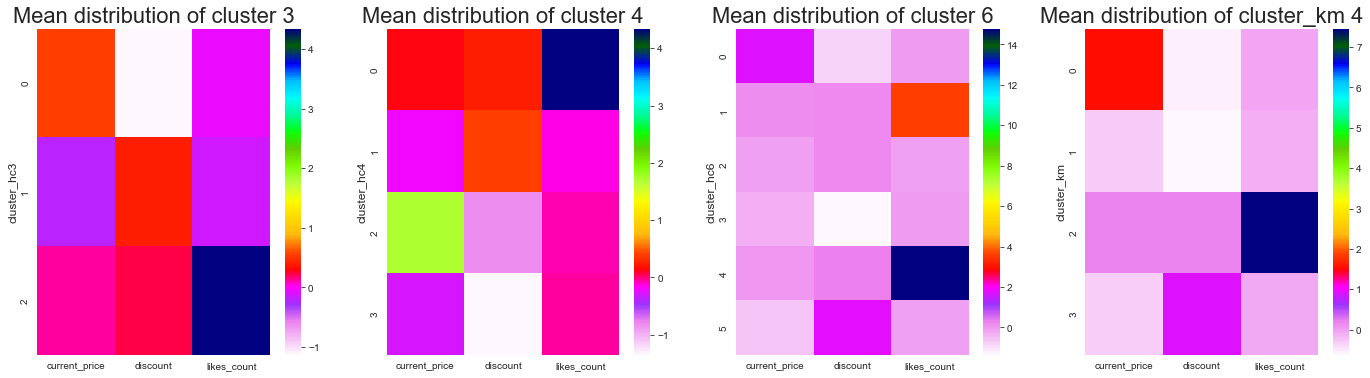

In [ ]:
# store the data for comparison
df_clean_sd_cp = df_clean_sd
df_clean_sd_cp["cluster_km"] = km_y_predicted
df_clean_sd_cp["cluster_hc3"] = y_hc_c3
df_clean_sd_cp["cluster_hc4"] = y_hc_c4
df_clean_sd_cp["cluster_hc6"] = y_hc_c6

# plot the mean distribution for each model
# using the normalized dataset
plt.figure(figsize=(24,6))

plt.subplot(1,4,1)
plt.title("Mean distribution of cluster 3",fontsize=22)
sns.heatmap(df_clean_sd_cp.loc[:,["current_price","discount","likes_count","cluster_hc3"]].groupby(['cluster_hc3']).mean(), cmap="gist_ncar_r")

plt.subplot(1,4,2)
plt.title("Mean distribution of cluster 4",fontsize=22)
sns.heatmap(df_clean_sd_cp.loc[:,["current_price","discount","likes_count","cluster_hc4"]].groupby(['cluster_hc4']).mean(), cmap="gist_ncar_r")

plt.subplot(1,4,3)
plt.title("Mean distribution of cluster 6",fontsize=22)
sns.heatmap(df_clean_sd_cp.loc[:,["current_price","discount","likes_count","cluster_hc6"]].groupby(['cluster_hc6']).mean(), cmap="gist_ncar_r")

plt.subplot(1,4,4)
plt.title("Mean distribution of cluster_km 4",fontsize=22)
sns.heatmap(df_clean_sd_cp.loc[:,["current_price","discount","likes_count","cluster_km"]].groupby(['cluster_km']).mean(), cmap="gist_ncar_r")

First three graphs show that when implementing  Hierarchical algorithm, how the mean value of three predictors distribute when the cluster number is 3, 4, and 6 respectively. The last matric graph shows when applying Kmeans with 4 clusters, how the mean value of 3 predictors distribute.

As graphs present, all algorithms can group objectives into different clusters under metrics. And each group merged is based on a compound criterion in our project as the algorithms applied are based on the calculation of distances either between objectives or clusters.

For hierarchical clustering, with the increasing number of clusters, the differences between some of those clusters are getting less. Among the clusters of 3, 4, and 6, the cluster number of 3 or 4 will be suggested for the Hierarchical clustering with the method of “Ward”. When K-means and Hierarchical clustering with 3 or 4 clusters, each cluster has a relatively strong characteristic to differentiate from other clusters. The characteristic of each cluster is the nature and pattern of the data we are looking for. Hence, both algorithms are suitable for this project. However, if we take efficiency and economy into account, Hierarchical clustering would not be a good choice. Although Hierarchical clustering can be applied to large datasets like this project, it not only needs advanced hardware to support but also is a time-consuming algorithm to construct dendrogram graphs with different linkage methods.

One of the top advantage for K-means algorithm is it is easy to implement. It is comfortable to use K-Means to deal with large number of variables with only small amount of time needed. These two advantages are also reflected in this data analytics task. Another advantage for K means is the algorithm is comfortable to change. As long as the change of centroids, an instance can be easily moved from one cluster towards another cluster. It is helpful when the analysis would like to move to deeper learning and training procedure. In terms of disadvantage, this algorithm is very sensitive to scale, as shown in the task, data preparation has huge weight before starting such algorithm. Low data preparation is very likely to produce completely different results. This algorithm relies much work on data normalization and standardization. Another factor is the order of the data actually has a huge impact to the final results. In order to avoid such disadvantage, only columns such as “current price”, “discount” and “likes_count” are used so that the original data order imapct is waved. Another issue is that it is difficult to predict the number of clusters, i.e. k value so that situations such as huge k values may exist. Moreover, K-means clusters purely rely on their geometric closeness to the centroinds so that densities of each cluster is ignored (Raykov, Boukouvalas, Baig, and Little 2016). This disadvantage is also shown in the presentation of the plot, each clusters are assumed to occupy same volumn in data space, it may create density problem and connected boundary problem.

A huge improvement of Hierarichical clustering is that it carrys more information of the data compared to the result of k-means. The progress of cluster mergence is mapped clearly via this method and also as shown in the analysis. There for it is always easy to decide the number of clusters by looking at the dendrogram. The most obvious disadvantage of this algorithm is it is very resistant to change. Once an instance is assigned to a cluster, it cannot be assigned to another any more.As a result, the accuracy of the data is far important, any wrong data could lead to misleading results. This indicates the importance of data preparation, any missing data, wrong information shall be carefully identified and removed from the beginning of the analysis process. Another disadvantage is this algorithm is time consuming which is not favorable to large datasets. For this case study, the running time for the Hierachical Clustering is about xx hours, so that it shows this algorithm is more time consuming and not friendly with larger datasets. Another disadvantages are quite similar to K means clustering that this algorithm is sensitive to the order of the data and to outliers. So that in order to remove the impact of order, only "cluster_hc","id","current_price","discount",and "likes_count" are used to do the further data mining procedure. Moreover, those points of outliers are also reflected in the plot of Hierarchical clustering, especially obvious in blue and light blur clusters. Certain amount of the data instances are not fit in the described characteristics.


In our experiments, K-means could be the best choice considering it can achieve an ideal result as Hierarchical clustering could but much easier to implement.

# Product scoring model

## Design scoring model

Because the existing NewChic dataset is not labeled, we added a label(new variable) to prepare for classification. We have tried three ways to label the data.

1.   Sort the data in ascending order according to current price and like count, and in descending order according to discount respectively. We add indexes to sequencing products. It means that the higher the current price is, the larger the index is. The less discount rate is, the larger the index is. The more like count is, the larger the index is. Then we give different weights to the current_price indexes, likes_count indexes and discount indexes, and sum them to get a score. In order to avoid the influence on the score after the single column value weighting calculation, we specially use the current ranking of each feature for weighting calculation. Because different characteristic value intervals are different, we can also set different intervals to represent different scores. After consideration, we think that this method is too subjective and depends on the experience of business personnel. Here, we use step size to stack the scores. In this case, the higher the score is, the better a product is. Then we sort the products in descending order according to the score. Considering the clustering result above, we divide the data equally into four groups labelling 0, 1, 2 and 3. Group 0 has the highest score and Group 3 has the lowest score. The imbalanced data problem can be resolved by using this method.

2.   Add labels to the products according to the K-means clustering result. Specifically, the dataset was divided into four clusters when we apply the K-means algorithm. In this case, we got four labels.

3.   Divide data into different groups according to the mean value of current price, discount and like count respectively. For example, if a product has a current price lower than the mean price, it will go to one group. If a product has a current price higher than the mean value, it will be grouped into another group. The similar rule applied when we consider discount and like count. In this case, we got six labels in total and added the labels to the products.

After exploring the three methods mentioned, we have found that there is an imbalanced data problem for the second and third methods. Especially for the second method, the product number in the largest cluster is 100 times that in the smallest cluster. As we all know, severely imbalanced data will be a huge problem for the classification algoeithms. Considering this, we decided to use the first method - The product scoring model to label the dataset. To be specific, we set the weights of the likes_count ranking, current_price ranking and discount ranking to 50%, 30% and 20% respectively because we believe that like count represents the product polularity and is the most important indicator. Following is the Top 10 product information based on this criterion.     

In [ ]:
# Rank according to the number of people you like from low to high. The higher the number of likers, the larger the ranking index, and the higher the weighted calculation result.
df_clean = df_clean.sort_values("likes_count", ascending=True, inplace=False).reset_index(drop=True)
likes_count_score_list = []

likes_count_box = 0
last_likes_count = 0

for index, row in df_clean.iterrows():
  if row['likes_count'] > last_likes_count:
    likes_count_box += 1
  last_likes_count = row['likes_count']
  likes_count_score = likes_count_box * 0.5
  likes_count_score_list.append(likes_count_score)

df_clean['likes_count_score'] = likes_count_score_list
df_clean['score'] = likes_count_score_list

# According to the current price from low to high, the higher the price, the larger the ranking index, and the higher the weighted score.
df_clean = df_clean.sort_values("current_price", ascending=True, inplace=False).reset_index(drop=True)

current_price_score_list = []
current_price_box = 0
last_current_price = 0

for index, row in df_clean.iterrows():
  if row['current_price'] > last_current_price:
    current_price_box += 1
  last_current_price = row['current_price']
  current_price_score = current_price_box * 0.3
  current_price_score_list.append(current_price_score)

df_clean['current_price_score'] = current_price_score_list
df_clean['score'] = df_clean['score'] + current_price_score_list

#The discount is ranked from high to low. The lower the discount, the greater the ranking index, and the higher the weighted calculation result.
df_clean = df_clean.sort_values("discount", ascending=False, inplace=False).reset_index(drop=True)
discount_score_list = []
discount_box = 0
last_discount = 0

for index, row in df_clean.iterrows():
  if row['discount'] < last_discount:
    discount_box += 1
  last_discount = row['discount']
  discount_score = discount_box * 0.2
  discount_score_list.append(discount_score)

df_clean['discount_score'] = discount_score_list
df_clean['score'] = df_clean['score'] + discount_score_list

# According to the total score, the higher the ranking, the better the product.
df_clean = df_clean.sort_values("score", ascending=False, inplace=False).reset_index(drop=True)
df_clean.head(10)
# df_clean.to_csv('label.csv')


,category,id,current_price,discount,likes_count,cluster_km,cluster_hc3,cluster_hc4,cluster_hc6,likes_count_score,score,current_price_score,discount_score
0,shoes,1212017,126.09,24,10146,2,2,0,4,1111.5,2726.8,1600.5,14.8
1,shoes,1350150,103.99,38,7430,2,2,0,1,1093.5,2687.7,1582.2,12.0
2,shoes,1368459,128.69,37,6137,2,2,0,1,1073.5,2687.4,1601.7,12.2
3,shoes,1231852,103.99,28,6635,2,2,0,1,1080.5,2676.7,1582.2,14.0
4,men,1204326,98.99,48,5856,2,2,0,1,1071.0,2653.0,1572.0,10.0
5,shoes,1243092,90.99,41,5818,2,2,0,1,1069.5,2637.9,1557.0,11.4
6,shoes,1137908,73.74,39,12005,2,2,0,4,1115.0,2635.8,1509.0,11.8
7,shoes,1349096,103.99,48,4474,2,2,0,1,1028.0,2620.2,1582.2,10.0
8,shoes,1423013,85.79,36,5557,2,2,0,1,1062.0,2620.0,1545.6,12.4
9,shoes,1247274,90.99,21,4753,2,2,0,1,1040.0,2612.4,1557.0,15.4


In [ ]:
df_clean.tail(10)

,category,id,current_price,discount,likes_count,cluster_km,cluster_hc3,cluster_hc4,cluster_hc6,likes_count_score,score,current_price_score,discount_score
49211,house,1711127,2.00,91,1,3,1,1,5,0.5,12.4,10.5,1.4
49212,men,1291442,1.20,94,19,3,1,1,5,9.5,12.4,2.1,0.8
49213,house,1709786,2.00,94,2,3,1,1,5,1.0,12.3,10.5,0.8
49214,house,1708604,2.00,94,1,3,1,1,5,0.5,11.8,10.5,0.8
49215,men,1217157,1.15,93,18,3,1,1,5,9.0,11.5,1.5,1.0
49216,house,1723488,1.50,70,1,3,1,1,5,0.5,11.2,5.1,5.6
49217,house,1710018,1.80,91,2,3,1,1,5,1.0,9.9,7.5,1.4
49218,house,1708877,1.80,94,3,3,1,1,5,1.5,9.8,7.5,0.8
49219,house,1716862,1.80,91,1,3,1,1,5,0.5,9.4,7.5,1.4
49220,house,1709353,1.60,94,0,3,1,1,5,0.0,6.5,5.7,0.8


## Labeling and sample balancing

As mentioned above, the dataset is divided into four groups equally. We also visualize the category distributions and the relationship of variables in each group.

In [ ]:
# It is divided into 4 categories
threshold = round(df_clean.shape[0] * 0.25 )

df_clean.loc[0 : threshold, 'label'] = 0
df_clean.loc[threshold : threshold * 2,'label'] = 1
df_clean.loc[threshold * 2 : threshold * 3,'label'] = 2
df_clean.loc[threshold * 3 : , 'label'] = 3
df_clean['label'] = df_clean['label'].astype('int')

df_clean.head()

,category,id,current_price,discount,likes_count,cluster_km,cluster_hc3,cluster_hc4,cluster_hc6,likes_count_score,score,current_price_score,discount_score,label
0,shoes,1212017,126.09,24,10146,2,2,0,4,1111.5,2726.8,1600.5,14.8,0
1,shoes,1350150,103.99,38,7430,2,2,0,1,1093.5,2687.7,1582.2,12.0,0
2,shoes,1368459,128.69,37,6137,2,2,0,1,1073.5,2687.4,1601.7,12.2,0
3,shoes,1231852,103.99,28,6635,2,2,0,1,1080.5,2676.7,1582.2,14.0,0
4,men,1204326,98.99,48,5856,2,2,0,1,1071.0,2653.0,1572.0,10.0,0


We got dataset with four balanced labels. Then we visualize the category distributions in different groups.

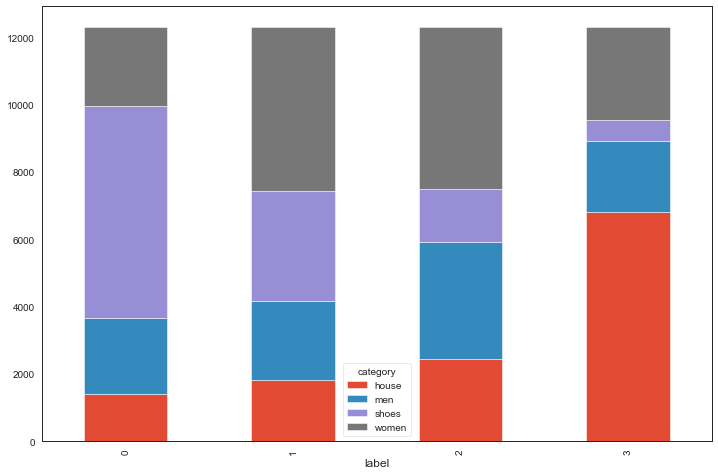

In [ ]:
df_plot = df_clean.groupby(['label', 'category']).size().reset_index().pivot(columns='category', index='label', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.show()

Total score of each category.

In [ ]:
df_clean[['score','category']].groupby('category').sum()

,score
category,
house,6636527.2
men,7738681.7
shoes,12614721.2
women,10918689.2


## Shuffle

In this step, we shuffle the data randomly to prepare for classification.

In [ ]:
# df_datasets.dtypes
X = df_clean[['current_price','discount', 'likes_count']]
y = df_clean['label']
# encoder = LabelBinarizer()
# y=encoder.fit_transform(df_clean['label'])
# print(y)
# Shuffle the data
X, y = sklearn.utils.shuffle(X, y)

## Split data set

The dataset is split into training set, validation set and test set according to the ratio of 6:2:2. The training set is used to train the models, and validation set and test set are used to evaluate the model performance.

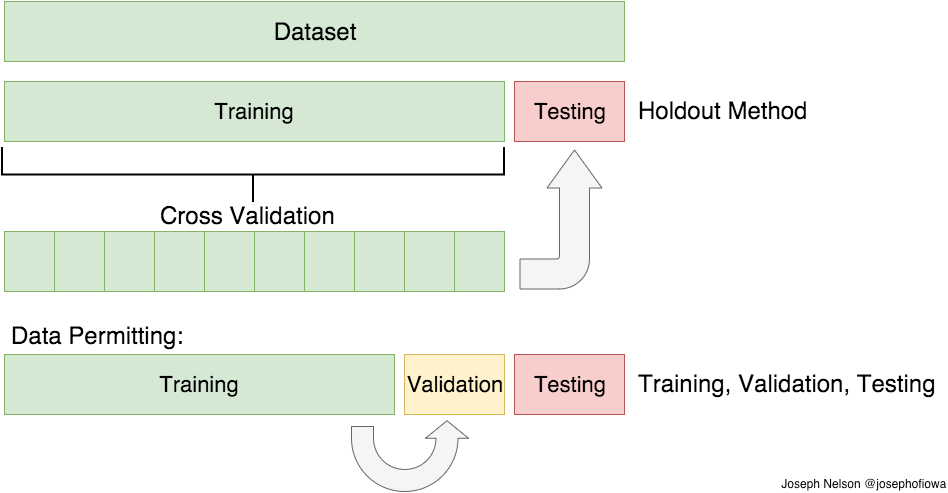

In [ ]:
# Split the dataset
# X_sd_train,X_sd_val_test,y_sd_train,y_sd_val_test = train_test_split(X_sd,y,test_size=0.6,random_state=0)
# X_sd_val,X_sd_test,y_sd_val,y_sd_test = train_test_split(X_sd_val_test,y_sd_val_test,test_size=0.5,random_state=0)

X_train,X_val_test,y_train,y_val_test = train_test_split(X,y,test_size=0.4,random_state=0)
X_val,X_test,y_val,y_test = train_test_split(X_val_test,y_val_test,test_size=0.5,random_state=0)

## StandardScaler

Current_price, discount and likes_count are in different ranges and measured in different measurement units, which will affect model performance. In order to solve this problem, we sandardize the features.

In [ ]:
X_train_sd = StandardScaler().fit_transform(X_train)
X_val_sd = StandardScaler().fit_transform(X_val)
X_test_sd = StandardScaler().fit_transform(X_test)

# Classification

## Model selection

In this part, our group aims to select two of the most suitable classification algorithms and apply them to our data analysis datasets. Also, the classification algorithms should be chosen from two perspectives: the structure of our datasets and the classifier performance based on our datasets.
To pick up the suitable classification algorithms, we selected eight popular classifiers to compare their metrics to help with the model selection.


During the selection process, we use the ShuffleSplit & Cross Validation to reduce the potential risks of overfitting problems to better evaluate the models predicting performance. In addition, the training accuracy, test accuracy, and 3*STD would be used to compare performance results within various models.


The metrics comparison table shows that most of the classifiers can provide a good training accuracy except the SGD classifier and BernoulliNB. As we mentioned in the context, the dataset's structure would be significant when considering our classification model. In this dataset, the data type is discrete data, and we label our data by ranking current_price, discount, and like_count to assign an index to each row from high to low or low to high. Weights would be assigned to each category to calculate final product scores based on product index and weight. However, for the tree classifiers, their If-Else structure will learn a training set perfectly by classifying each product's index to determine its category (Saini, 2021), which is quite similar to the method we label our dataset. Thus, the high train accuracy under the tree classifiers could be caused by the overfitting issue, and these three classifiers are not considered in the final selection.

For the Gaussian Naïve Bayes, it assumes that a feature's value is independent of the value of other features. Based on the correlation heatmap, current_price & discount and current_price & likes_count is not highly correlated. Thus, Gaussian Naïve Bayes is selected as one of classifier for the experiment. Also, the K-nearest neighbors (KNN) algorithm, which is a simple and easy implement supervised ML algorithm, provides a good training accuracy in the table. In conclusion, our group selects Gaussian Naïve Bayes and KNN as classification algorithms in the experiment.

In [ ]:
MLA = [
    ensemble.ExtraTreesClassifier(),
    ensemble.RandomForestClassifier(),
    linear_model.SGDClassifier(),
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    neighbors.KNeighborsClassifier(),
    tree.DecisionTreeClassifier(),
    discriminant_analysis.QuadraticDiscriminantAnalysis()
]

#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
# MLA_predict = df_datasets["label"]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    # classifier = OneVsRestClassifier(alg,n_jobs=-1)

    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, X, y, cv=cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!

    # alg.fit(df_datasets[data1_x_bin], df_datasets[Target])
    # MLA_predict[MLA_name] = alg.predict(df_datasets[data1_x_bin])

    row_index += 1


#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
6,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",1.0,0.991887,0.003003,0.031262
1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",1.0,0.990973,0.002923,1.458193
0,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",1.0,0.984587,0.003024,1.276217
5,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.971803,0.947694,0.004653,0.030077
7,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_cova...",0.940007,0.940516,0.004918,0.008083
4,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.863077,0.864536,0.004615,0.0
2,SGDClassifier,"{'alpha': 0.0001, 'average': False, 'class_wei...",0.655885,0.656416,0.05865,0.192139
3,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.254598,0.248541,0.008785,0.012155


## KNeighborsClassifier(KNN)

The KNN algorithm assumes that similar data points will stay close to others. For any new example in the chart, the KNN classifier would determine the number of K, which is the nearest neighbor to that new example, and the new example is classified by its nearest neighbors (Harrison, 2018).

In this experiment, the sklearn library has been imported to build the KNN model. The decision of the K value would be the most important part of the case. We use the GridSerachCV to perform the hyperparameter tunning to determine the k value for our KNN model. There could be a higher dependency on the result if it is too small for the K value. So, we set a range of (5, 20), and GridSearchCV tries all the combinations and evaluates the model's performance under each set. It can be found from the final results that the KNN model reaches the best score when the k value is equal to 5. After applying the training dataset to the KNN model, we use the test dataset and validation dataset to check its performance, the test accuracy with KNN is 95.66%, and the validation accuracy with KNN is 96.17%.

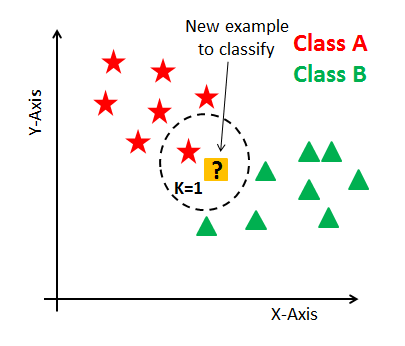


Figure: K-nearest Neighbor (Al-Serw, 2021)

In [ ]:
### *Grid* search and cross validation

# 1 Instantiate predictor class
knn_estimator = neighbors.KNeighborsClassifier()
# 2 Model selection and Optimization -- grid search and cross validation
# Prepare the hyperparameters to be adjusted
param_dict = {'n_neighbors':np.arange(5,20)}
knn_cv = GridSearchCV(knn_estimator, param_grid=param_dict, cv=3)  # n_jobs = -1, full load, CPU direct 100%
# 3 Fit data for training
knn_cv.fit(X_train_sd, y_train)

print("Best score with K-NN: {0:.2f}%".format(knn_cv.best_score_ * 100))
print("Best params with K-NN: {} ".format(knn_cv.best_params_))

knn_y_predict = knn_cv.predict(X_test_sd)
knn_score = knn_cv.score(X_test_sd, y_test) * 100
print("Test accuracy with K-NN: {0:.2f}%".format(knn_score))

knn_y_val = knn_cv.predict(X_val_sd)
knn_val_score = knn_cv.score(X_val_sd, y_val) * 100
print("Validate accuracy with K-NN: {0:.2f}%".format(knn_val_score))



Best score with K-NN: 97.42%
Best params with K-NN: {'n_neighbors': 5} 
Test accuracy with K-NN: 95.66%
Validate accuracy with K-NN: 96.17%


## GaussianNB

Naïve Bayes assumes that a feature's value is independent of the value of other features. In this experiment, we only consider the Gaussian Naive Bayes as the BernoulliNB is designed for the binary features. It can also be found from the Model selection comparison table that the training accuracy under the BernoulliNB classifier is only 25.43%. For Gaussian Naive Bayes, we know it must follow the Bayes Rule, and the P(x|c) can be known from the training dataset to get the P(c|x) (c is the class variable, and x represents the features). Also, in this case, we have three variables as inputs, and the features are independent of each other, so the probability of each given class variable can also be calculated from the training dataset. Therefore, for each test example, we can calculate the probability under each class ( P(x|c)P(x) ) and choose the class with the biggest probability (Chauhan, 2022).

In this experiment, the sklearn library has been imported to build the GaussianNB classifier. After applying the training dataset to the GaussianNB model, we use the test dataset and validation dataset to check its performance, the test accuracy with GaussianNB is 84.39%, and the validation accuracy with GaussianNB is 83.84%.

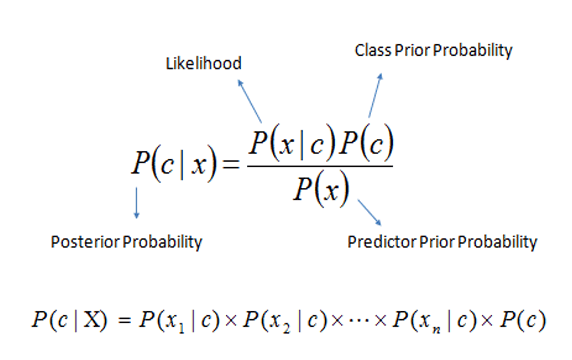

Figure Naive Bayes Formula (S, 2019)

In [ ]:
nb_estimator = naive_bayes.GaussianNB()
nb_estimator.fit(X_train_sd, y_train)
nb_y_predict = nb_estimator.predict(X_test_sd)
nb_score = nb_estimator.score(X_test_sd, y_test) * 100
print("Test accuracy with GaussianNB: {0:.2f}%".format(nb_score))

nb_y_val = nb_estimator.predict(X_val_sd)
nb_val_score = nb_estimator.score(X_val_sd, y_val) * 100
print("Validate accuracy with GaussianNB: {0:.2f}%".format(nb_val_score))


Test accuracy with GaussianNB: 84.39%
Validate accuracy with GaussianNB: 83.84%


## Results Comparison

For classification problems, we generally use confusion matrix to observe the evaluation results.

1. When the prediction is positive and the real value is also positive, it is true positive.
2. When the prediction is negative and the real value is also negative, it is true negative.
3. When the prediction is positive but the real value is negative, it is false positive.
4. When the prediction is negative but the real value is positive, it is false negative.

Through the confusion matrix, we can not only understand the errors made by the classification model, but also understand the types of errors. This decomposition and display of the results can solve the limitation of using only classification accuracy.

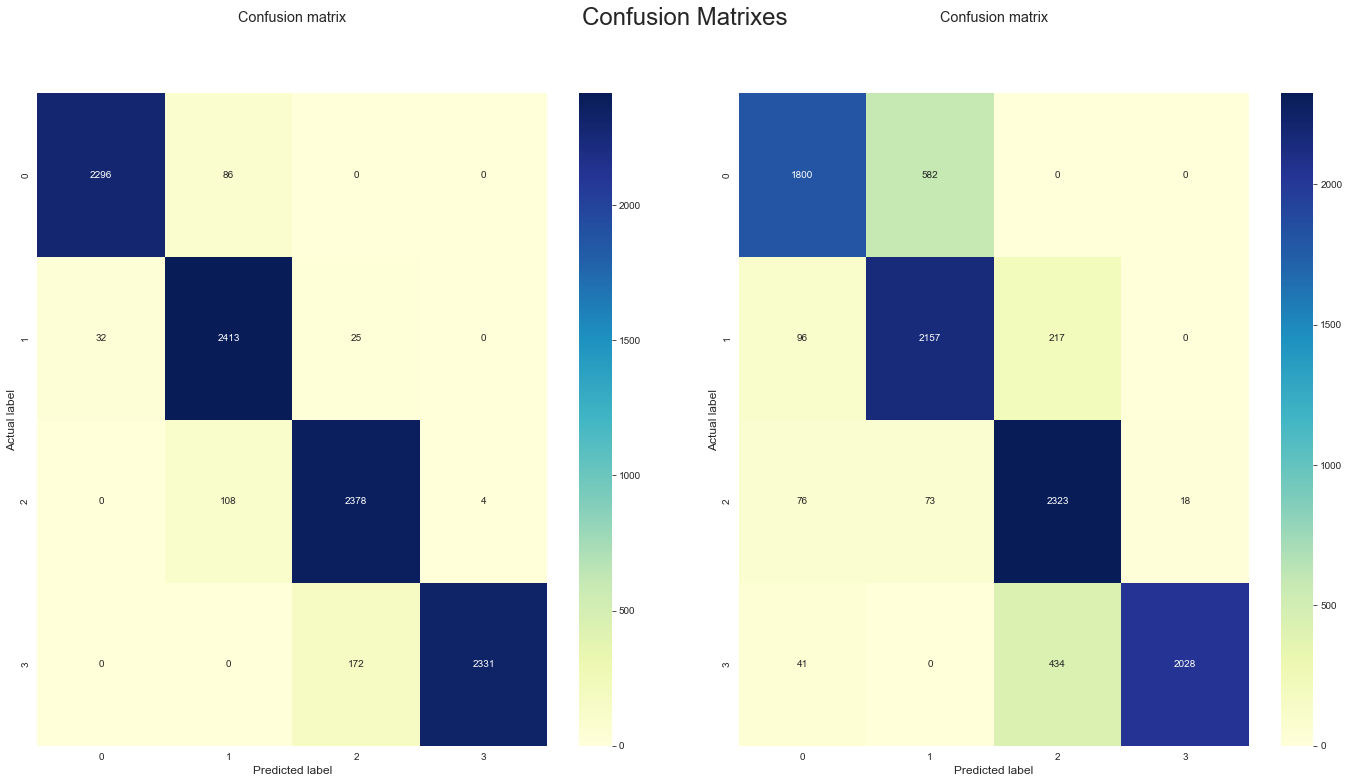

In [ ]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.1)

plt.subplot(1,2,1)
# metrics.plot_confusion_matrix(estimator, X_test, y_test)
cnf_matrix = metrics.confusion_matrix(y_test, knn_y_predict)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.subplot(1,2,2)
# metrics.plot_confusion_matrix(estimator, X_test, y_test)
nb_cnf_matrix = metrics.confusion_matrix(y_test, nb_y_predict)
nb_p = sns.heatmap(pd.DataFrame(nb_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# plt.subplot(1,3,3）
# cm_rf = metrics.confusion_matrix(y_test,nb_y_predict)
# plt.title("Random Forest Confusion Matrix")
# sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

From the confusion matrixes under each classifier, it can be seen that KNN performs better than Gaussian Naive Bayes.

| Class       |  KNN  |  Gaussian Naive Bayes  |
| ----------- |:-----:|  --------------------: |
|   0         |  2296 |         1800           |
|   1         |  2413 |         2157           |
|   2         |  2378 |         2323           |
|   3         |  2331 |         2028           |

The above summary shows that the KNN has a slightly higher accuracy in prediction under each class than Gaussian Naive Bayes. and we will check the precision and recall metrics under each classifiers in the following code.



In [ ]:
print(metrics.classification_report(y_test, knn_y_predict))
print(metrics.classification_report(y_test, nb_y_predict))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2382
           1       0.93      0.98      0.95      2470
           2       0.92      0.96      0.94      2490
           3       1.00      0.93      0.96      2503

    accuracy                           0.96      9845
   macro avg       0.96      0.96      0.96      9845
weighted avg       0.96      0.96      0.96      9845

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      2382
           1       0.77      0.87      0.82      2470
           2       0.78      0.93      0.85      2490
           3       0.99      0.81      0.89      2503

    accuracy                           0.84      9845
   macro avg       0.86      0.84      0.84      9845
weighted avg       0.86      0.84      0.84      9845



After applying the testing dataset to the classification models, we can use precision and recall as performance metrics to evaluate KNN and Gaussian Naive Bayes. Precision is calculated by the true positives over the number of total positives predicted by our model (TP/(TP+FP)), and it can be used to reflect if the positive predictions conducted by our model are actually positive. It can be found from the above table that both two classifiers can provide a good accuracy under each class, and the predicted positive rate under KNN is higher than the Gaussian Naive Bayes (96% vs 86%). For the recall, which is calculated by the true positive over the number of actual positive outcomes (TP/(TP+FN)), we can use this metric to evaluate the performance of our model in identifying the actual true result. The Gaussian Naive Bayes provides the good rate under each class. However, The table results show that the KNN model reach the 100% under class 3, it seems like there is an overfitting issue under these two classes. Based on the p-value from the t-test, it can be found the difference between two classifiers is highly significant. So, we think the Gaussian Naive Bayes and KNN provide good performance regards our datasets.

In [ ]:
# comparasion
clf_gnb = naive_bayes.GaussianNB()
clf_knn = neighbors.KNeighborsClassifier(n_neighbors=8)
scores_gnb = model_selection.cross_val_score(clf_gnb, X_train_sd, y_train, scoring='accuracy', cv=10)
print('Gaussian Naive Bayes accuracy range: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'% (scores_gnb.min(), scores_gnb.max(), scores_gnb.mean(), scores_gnb.std()))
scores_knn = model_selection.cross_val_score(clf_knn, X_train_sd, y_train, scoring='accuracy', cv=10)
print('KNN Classifier accuracy range: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'% (scores_knn.min(), scores_knn.max(), scores_knn.mean(), scores_knn.std()))
# This is to show t-test on their performances.
# print(scores_gnb)
# print(scores_knn)
from scipy.stats import ttest_ind

t, p = ttest_ind(scores_gnb, scores_knn)
print ('t, p: %.4f, %.4f\n' % (t, p))



Gaussian Naive Bayes accuracy range: [0.8561, 0.8733]; mean: 0.8634; std: 0.0056

KNN Classifier accuracy range: [0.9675, 0.9814]; mean: 0.9768; std: 0.0036

t, p: -51.4258, 0.0000



# Result Discussion

Supervised learning and unsupervised learning are two essential components of machine learning. The former is given classification criteria by the experimenter so that the machine can classify data from big data according to the criteria, and the latter is obtained through the integration of data to obtain common properties and group them into one category. The KNN, the Naive Bayes, and the decision tree belong to supervised learning methods, and classification and regression are the application of those machine learning algorithms. Likewise, k-means clustering and hierarchical clustering are two algorithms for unsupervised machine learning(Malik and Tuckfield, 2019).


##Clustering Results

According to Tan, Steinbach, Karpatne, and Kumar (2019), "Introduction to Data Mining" (p. 531), a well-separated cluster refers to each object in the same cluster that is closer or more similar to each other than it is in other clusters. The following picture (a) shows an example of a well-separated cluster:

#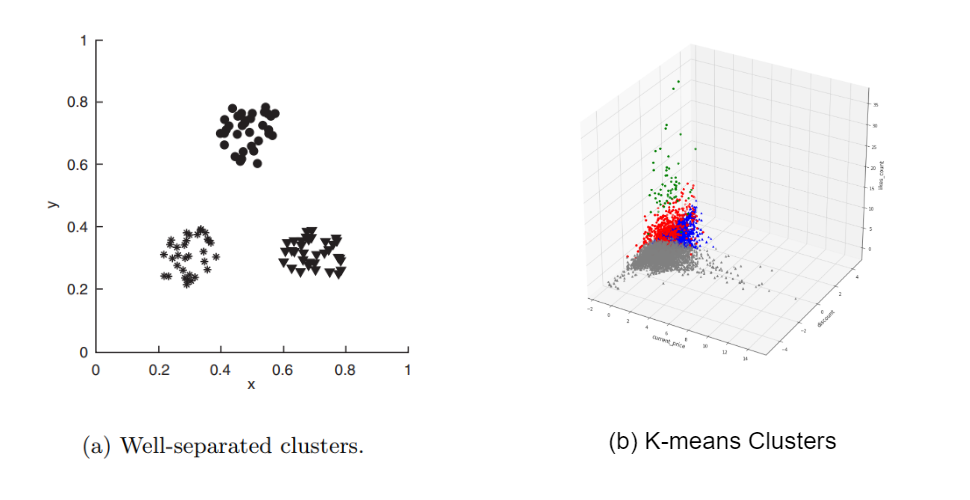
The well-separated clusters in Figure (a) are an idealized result. But the cluster obtained from real data is not necessarily 100% well-separated.  

K-means and Hierarchical clustering algorithm are used to analyse the different variables. The task for this assignment is to group 4 categories of products based on “current price”, “discount” and “like counts”.



According to the criteria: each object in the same cluster is closer or more similar to each other than it is in other clusters. After implementing 2 clustering algorithms, based on the best result from means we can tell each cluster can well separate from each other from 2 perspectives.

From the Figure (b) 3D plot, one cluster on the top, most instances of it has a higher likes-count, one cluster on the right side, most instances have a higher current price, rest of the two clusters underneath share the same range of price and likes-count, they separate by the discount.
From the mean value of each cluster can get the same conclusion. Each cluster has its distinct attribution which can differentiate it from other clusters, we could say they separate well from each other. And we can see one cluster only has a few points – around 500 instances. We can tell from the 3D plot, that this cluster is high in likes-count, as the likes count is much higher than the average level, it is also a good sign that data points in smaller clusters didn’t leave away from the centroid in order to focus more on the larger cluster, which means those clusters separate well.

After the data preparation process, the plot of Within Sum of Squares (WSS) shows the best possible k value for K means algorithm is likely to be value 4 as the graph gradient turns at k=4. As shown in the count function of each cluster, cluster 1 where all the blue points located, only counts for 509. This accounts the minor group of the four clusters which only accounts for 10.3% of the total data. Other clusters such as cluster 2 dotted in gray and cluster 3 dotted in green color have far more points which count for 19523 and 21341 separately. Each cluster has designed scoring classification for us, which has certain reference significance and value. If we divide more clusters, we may find some meaningless clusters. For example, when we try to divide into six clusters, the cluster characteristics are not so obvious, which is of no reference significance to our experiment.

Among those clusters, the most meaningful cluster should be the one with the highest likes-count. As when we try to pick up the best 10 products and three categories, we take the weight of each predictor to indicate the importance of the product. The highest weight to be considered is likes-count. That implied, that the best 10 products must have one characteristic that is high in likes-count. Based on the 3 criteria we made for the best products, they should distribute in the cluster with the highest likes-count, also those products with a relatively high price and a relatively low discount within this cluster. The end of the experiment also verified that.

Our experiments show that the two clustering algorithms used are both suitable for big data analysis, but each has its own suitable scenarios. Kmean provides better help for our experiment because it occupies less resources and quickly divides the data into clusters with distinct characteristics, which provides reference value for our subsequent experiments.

##Classification Results



Classification in machine learning refers to the process of predicting given data points. There are several types of classification models, such as logistic regression, K-nearest neighbors, support vector machine, and Naive Bayes classifier. According to selection criteria of data structure and possible overfitting concerns, K-nearest neighbors and the Naive Bayes classifier are chosen for further data mining procedures as these algorithms are likely to produce a decent performance.

In our experiment, it can be found from the results of confusion matrix that KNN and Gaussian can both provide a good prediction regards different classes. In addition, the precision and recall under each classifier prove that these two classifiers can precisely predict products and separate them into different classes (avg 96% for KNN and avg 86% for Gaussian). Also, the figures for True positive and False Negative for each class pair are sound and solid, which are 2296, 2413, 2378, and 2331 for pairs of each two classes, respectively. The figures show that the distribution of instances between the four classes is quite similar. So, there is no such class with only a few points.


Compared with the classification algorithms implemented in this experiment, KNN is a simple classification algorithm to implement as it is called a lazy learner capable of instance-based learning (Kumar 2019). It only stores the training dataset and learns from it only at the time of prediction, while KNN works not well with large datasets as the calculation of distance between new points and test objects can be time-consuming, which is likely to degrade the performance of the algorithm. For Naïve Bayers, which is time-saving, efficient, and suitable for solving multi-class prediction problems. Such an advantage is also reflected in this experiment. From the final testing performance of these two classifiers, we can see they both provide a good performance regards our dataset. For big data analytics, we think Naive Bayers is more helpful than KNN. Because Naive Bayers is mainly used for large datasets and especially for features with high independence, KNN is more suitable for small datasets.


After the whole data analysis process for NewChic, we realized the data preparation has huge weight before starting any model training. Low data preparation is very likely to produce completely different results. This algorithm relies much work on data normalization and standardization.  Another factor is the order of the data accuracy, which has a huge impact on the final results.


So, the accuracy of the data is far more important. Any incorrect data could lead to misleading results. This indicates the importance of data preparation, any missing data, or wrong information shall be carefully identified and removed from the beginning of the analysis process.


##Conclusion

In this project, we analysed the business problems of NewChic in the discovery phase, which are finding the Top 10 products and best category. After examining the data structure of the NewChic products, four categories including women, men, house and shoes are selected for further analysis. Besides, potential hypothesises of the definitions of "Top 10" and "The Best" are provided in this phase. Followed by that, we did data cleaning (missing value, invalid value, duplicated value and outlier) and data visualization in the data preparation phase. After checking the relationships of different numerical variables, we selected three features current_price, discount and likes_count for clustering and classification algorithms. We also standardize the features to avoid the influence of different measurement units on algorithm performance. Next, two algorithms K-means and hierarchical clustering are used to do clustering and their results are compared. Before doing classification, we tried three different approaches to add product labels. After comparison, the product scoring model is chosen in this part. Followed by that, we compared the performance of different classification algorithms when doing classification. Two suitable algorithms KNN and GaussianNB are selected in this part. We also compared their performance results in detail.

We discuss the analytical results and figure out the Top 10 products in the categories of women, men, house and shoes. **The top 10 products** are shown below:

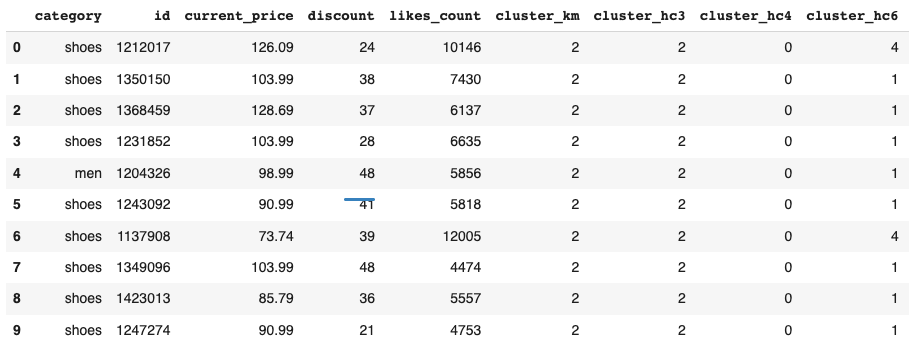

We can find that 9 of the Top10 products are from the shoes category while one of them is from the men category. All the products have relatively high current prices, moderate discount (not too high) and more like count. **This result is also in line with the clustering results**, and they are all in one single cluster except the the hirerarchical clustering with six clusters. Those selected products have both high popularity and profit margin based on our hypothesis.

Besides, **the shoes category is considered the best of the four categories** mentioned due to the following reasons:

1.   According to the product scoring model, the shoes category has the highest total score.

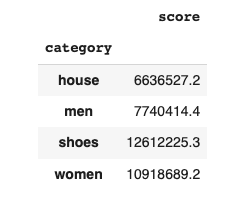

2.   90% of the Top10 products are from the shoes category, which helps the company generate a high profit.

3.   The shoes category has a range of subcategories and a large number of products, which satisfied different customers' needs.


Based on our analysis, NewChic is suggested to **optimise the stock by picking top products and investing more in the categories of shoes and women to maximise its profit.** The categories of shoes and women have relatively high scores. According to the product scoring model, we also suggest NewChic **avoid products with low scores**, **which means that those products have relatively low like count, low current price and high discounts**. In addition, **the house category is not prioritised when making investment decisions due to low product scores**.

# Reference
Al-Serw, N., 2021. K-nearest Neighbor: The maths behind it, how it works and an example. [online] Medium. Available at: <https://medium.com/analytics-vidhya/k-nearest-neighbor-the-maths-behind-it-how-it-works-and-an-example-f1de1208546c> [Accessed 22 August 2022].

Chauhan, N., 2022. Naïve Bayes Algorithm: Everything You Need to Know. [online] KDnuggets. Available at: <https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html> [Accessed 23 August 2022].

Harrison, O., 2018. Machine Learning Basics with the K-Nearest Neighbors Algorithm. [online] Medium. Available at: <https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761#:~:text=KNN%20works%20by%20finding%20the,in%20the%20case%20of%20regression).> [Accessed 23 August 2022].

Jaadi, Z., 2019. When and Why to Standardize Your Data?. [online] Built In. Available at: <https://builtin.com/data-science/when-and-why-standardize-your-data> [Accessed 25 August 2022].

Makara, V., Reddy, M., Vivekananda, M. and Satish, N. (2017). Divisive Hierarchical Clustering with K-means and Agglomerative Hierarchical Clustering Divisive Hierarchical Clustering with K-means and Agglomerative Hierarchical Clustering. International Journal of Computer Science Trends and Technology (IJCST), 5.

Malik, A. and Tuckfield, B., 2019. Applied Unsupervised Learning with R. Birmingham: Packt Publishing Ltd.

Raykov YP, Boukouvalas A, Baig F, Little MA. What to Do When K-Means Clustering Fails: A Simple yet Principled Alternative Algorithm.

Saini, A., 2021. Decision Tree Algorithm - A Complete Guide - Analytics Vidhya. [online] Analytics Vidhya. Available at: <https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/> [Accessed 23 August 2022].

S, Y., 2019. An Introduction to Naïve Bayes Classifier. [online] Medium. Available at: <https://towardsdatascience.com/introduction-to-na%C3%AFve-bayes-classifier-fa59e3e24aaf> [Accessed 23 August 2022].

Tan, P., Steinbach, M., Karpatne, A. and Kumar, V., n.d. Introduction to data mining.

Vijaya, Sharma, S. and Batra, N. (2019). Comparative Study of Single Linkage, Complete Linkage, and Ward Method of Agglomerative Clustering. [online] IEEE Xplore. doi:10.1109/COMITCon.2019.8862232.

